In [1]:
##### script to try the Galaxy Cluster DM generation

#--------------------
# imports
#--------------------

import os, sys, glob
import numpy as np
from utils import rotate_data, readsnapsgl, write_fits_image,plot_cluster
from astropy.cosmology import FlatLambdaCDM 

Code='GadgetX' # the simulation code
path="/home2/weiguang/The300/data/" 
#groupinfo=np.loadtxt("/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/G3X_Mass_snap_128-center-cluster.txt")
Simun = "simulation/"+Code+"/"
Outdir = './'

Use_Lra = True # use less rotations

# two arguments given to the function, the first and the last region



RAs = np.loadtxt('29_rotations.txt',dtype=np.int32)

selecth=np.load('/home2/weiguang/Project-300-Clusters/ML/Reselected_all_halos.npy')
#HID M200 Rid

    
#------------    
# Open data
#------------

for lp in [4]:
    clnum='0000'+str(lp)
    clnum=clnum[-4:]
    cname = "NewMDCLUSTER_"+clnum+"/"

    # Check outputs
    outcat = cname + "/"
    if not os.path.exists(outcat):
        os.mkdir(outcat)

    idr = np.where(np.int32(selecth[:,2]+0.1)==lp)[0]
    if len(idr)<1:
        raise ValueError('No regions find in selected halo',lp)

    Hids = np.int64(selecth[idr,0]+0.1)    #AHF halo IDs
    sn = np.array([np.int32(str(i)[:3]) for i in Hids])
    idshid=np.argsort(Hids)
    Hids=Hids[idshid]; sn=sn[idshid]; idr=idr[idshid]
    st=0
    
    for j, s, hid in zip(idr, sn , Hids): # loop over snaps
        print(j,s,hid)
        snapname = 'snap_'+str(s)
        #print(snapname)
        #ds = yt.load(path+Simun+cname+snapname, field_spec="my_def") # it can also be done using yt
        snapfile = path+Simun+cname+snapname
        
        head=readsnapsgl(path+Simun+cname+snapname,'HEAD')
        if head.Redshift<0:
            head.Redshift = 0.0000

        # load the data 
        particle = 1
        pos = readsnapsgl(snapfile, 'POS ', ptype=particle)
        mass = readsnapsgl(snapfile, 'MASS', ptype=particle)
        print('path = ',snapfile)
        
        


        
        
        #------------    
        # Cuts
        #------------
        
        
        halo = np.load('/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/GadgetX/G3X_Mass_snap_'+str(s)+'info.npy')
        idg = np.where((halo[:,0]==lp) & (halo[:,1]==hid))[0]
        if len(idg) == 1:
            cc = halo[idg[0],4:7]; rr = halo[idg[0],7]
        else:
            raise ValueError('Halo not find.... ',lp,hid)
        
        # apply mask
        
        mask2= np.where((pos[:,0]<=cc[0]+2*rr)&(pos[:,0]>=cc[0]-2*rr)&
                (pos[:,1]<=cc[1]+2*rr)&(pos[:,1]>=cc[1]-2*rr)&
                (pos[:,2]<=cc[2]+2*rr)&(pos[:,2]>=cc[2]-2*rr))
    
        

        pos_inside = pos[mask2]
        mass_inside = mass[mask2]
        pos_centered = pos_inside
        
        pos_inside_gas = pos_gas[mask2]
        
        pos_inside_star = pos_star[mask2]
        mass_inside_star = mass_star[mask2]
        
        
        #center the data to be rotated
        pos_inside[:,0] = pos_inside[:,0]-cc[0]
        pos_inside[:,1] = pos_inside[:,1]-cc[1]
        pos_inside[:,2] = pos_inside[:,2]-cc[2]
        
        pos_inside_gas[:,0] = pos_inside_gas[:,0]-cc[0]
        pos_inside_gas[:,1] = pos_inside_gas[:,1]-cc[1]
        pos_inside_gas[:,2] = pos_inside_gas[:,2]-cc[2]
        
        pos_inside_star[:,0] = pos_inside_star[:,0]-cc[0]
        pos_inside_star[:,1] = pos_inside_star[:,1]-cc[1]
        pos_inside_star[:,2] = pos_inside_star[:,2]-cc[2]
        
        
        def indices_inside(pos,r,center = (0,0,0)): 

            x = pos[:,0]
            y = pos[:,1]
            z = pos[:,2]

            mask = np.where((x**2+y**2+z**2)<r**2)

            return mask
        
        mask_sphere = indices_inside(pos_inside,rr)
        print('spherical mass = ', mass_inside[mask_sphere].sum())
        
        mask_sphere = indices_inside(pos_inside_gas,rr)
        print('spherical mass = ', mass_inside_gas[mask_sphere].sum())
        
        mask_sphere = indices_inside(pos_inside_star,rr)
        print('spherical mass = ', mass_inside_star[mask_sphere].sum())
        
        
        #------------    
        # Rotations
        #------------
        ra = 0
        RA = RAs[0]
        rot = rotate_data(pos_inside,RA)[0]
        mask = np.where((rot[:,0]<=rr)&(rot[:,0]>=-rr)&
                (rot[:,1]<=rr)&(rot[:,1]>=-rr)&
                (rot[:,2]<=rr)&(rot[:,2]>=-rr))
        rot = rot[mask]
        
        w = mass_inside[mask]
        #------------    
        # Create the 2D projection
        #------------
        N = 640
        x = rot[:, 0] 
        y = rot[:,1] 
        img,xedges,yedges = np.histogram2d(x,y,bins=(N,N),weights=w)
        img = img.T
        plot_cluster(img)
        print('masa map', img.sum())
        print('masa escalar',w.sum())
        #------------    
        # Save data
        #------------
            
 

    # et voila


266 123 123000000000001
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  386008680
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  386008680
VEL  386008680
ID   128669560
MASS 128669560
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0004/snap_123


NameError: name 'pos_gas' is not defined

In [2]:
mass = readsnapsgl(snapfile, 'MASS', ptype=particle)

detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
VEL  364441476
ID   121480492
MASS 121480492


In [6]:
mass

array([0.02362952, 0.02363071, 0.00796717, ..., 0.02363749, 0.0236445 ,
       0.02363685], dtype=float32)

#  check different masses

0 123 123000000000001
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
VEL  363952740
ID   121317580
MASS 121317580
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_123
MASS DM [0.12691148 0.12691148 0.12691148 ... 0.12691148 0.12691148 0.12691148]
MASA 3D: 15.253688592322257
15.325815215015327


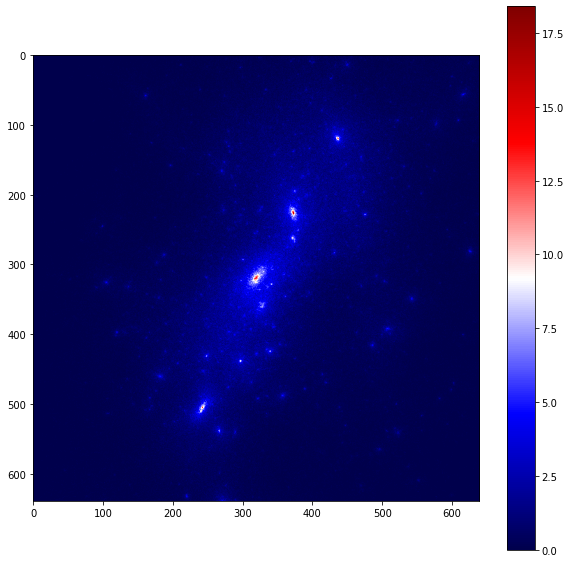

NameError: name 'mass_profile' is not defined

In [2]:
##### script to try the Galaxy Cluster DM generation

#--------------------
# imports
#--------------------

import os, sys, glob
import numpy as np
from utils import rotate_data, readsnapsgl, write_fits_image,plot_cluster
from astropy.cosmology import FlatLambdaCDM 

Code='GadgetX' # the simulation code
path="/home2/weiguang/The300/data/" 
#groupinfo=np.loadtxt("/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/G3X_Mass_snap_128-center-cluster.txt")
Simun = "simulation/"+Code+"/"
Outdir = './'

Use_Lra = True # use less rotations

# two arguments given to the function, the first and the last region



RAs = np.loadtxt('29_rotations.txt',dtype=np.int32)

selecth=np.load('/home2/weiguang/Project-300-Clusters/ML/Reselected_all_halos.npy')
#HID M200 Rid

    
#------------    
# Open data
#------------

for lp in [1]:
    clnum='0000'+str(lp)
    clnum=clnum[-4:]
    cname = "NewMDCLUSTER_"+clnum+"/"

    # Check outputs
    outcat = cname + "/"
    if not os.path.exists(outcat):
        os.mkdir(outcat)

    idr = np.where(np.int32(selecth[:,2]+0.1)==lp)[0]
    if len(idr)<1:
        raise ValueError('No regions find in selected halo',lp)

    Hids = np.int64(selecth[idr,0]+0.1)    #AHF halo IDs
    sn = np.array([np.int32(str(i)[:3]) for i in Hids])
    idshid=np.argsort(Hids)
    Hids=Hids[idshid]; sn=sn[idshid]; idr=idr[idshid]
    st=0
    
    for j, s, hid in zip(idr, sn , Hids): # loop over snaps
        print(j,s,hid)
        snapname = 'snap_'+str(s)
        #print(snapname)
        #ds = yt.load(path+Simun+cname+snapname, field_spec="my_def") # it can also be done using yt
        snapfile = path+Simun+cname+snapname
        
        head=readsnapsgl(path+Simun+cname+snapname,'HEAD')
        if head.Redshift<0:
            head.Redshift = 0.0000

        # load the data 
        particle = 1
        pos = readsnapsgl(snapfile, 'POS ', ptype=particle)
        mass = readsnapsgl(snapfile, 'MASS', ptype=particle)
        print('path = ',snapfile)
        print('MASS DM',mass)

        
        
        #------------    
        # Cuts
        #------------
        
        
        halo = np.load('/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/GadgetX/G3X_Mass_snap_'+str(s)+'info.npy')
        idg = np.where((halo[:,0]==lp) & (halo[:,1]==hid))[0]
        if len(idg) == 1:
            cc = halo[idg[0],4:7]; rr = halo[idg[0],7]
        else:
            raise ValueError('Halo not find.... ',lp,hid)
        
        # apply mask
        
        mask2= np.where((pos[:,0]<=cc[0]+2*rr)&(pos[:,0]>=cc[0]-2*rr)&
                (pos[:,1]<=cc[1]+2*rr)&(pos[:,1]>=cc[1]-2*rr)&
                (pos[:,2]<=cc[2]+2*rr)&(pos[:,2]>=cc[2]-2*rr))

        pos_inside = pos[mask2]
        mass_inside = mass[mask2]
        pos_centered = pos_inside
        
        #center the data to be rotated
        pos_inside[:,0] = pos_inside[:,0]-cc[0]
        pos_inside[:,1] = pos_inside[:,1]-cc[1]
        pos_inside[:,2] = pos_inside[:,2]-cc[2]
        
        
        
        def indices_inside(pos,r,center = (0,0,0)): 

            x = pos[:,0]
            y = pos[:,1]
            z = pos[:,2]

            mask = np.where((x**2+y**2+z**2)<=r**2)

            return mask
        
        
        mask_sphere = indices_inside(pos_inside,rr)
        print('MASA 3D:',np.log10(mass_inside[mask_sphere].sum()*1e10))
        
        print(np.log10(halo[idg[0],3]))
        
        #------------    
        # Rotations
        #------------
        ra = 0
        RA = RAs[0]
        rot = rotate_data(pos_inside,RA)[0]
        mask = np.where((rot[:,0]<=rr)&(rot[:,0]>=-rr)&
                (rot[:,1]<=rr)&(rot[:,1]>=-rr)&
                (rot[:,2]<=rr)&(rot[:,2]>=-rr))
        rot = rot[mask]
        
        w = mass_inside[mask]
        #------------    
        # Create the 2D projection
        #------------
        N = 640
        x = rot[:, 0] 
        y = rot[:,1] 
        img,xedges,yedges = np.histogram2d(x,y,bins=(N,N),weights=w)
        img = img.T
        plot_cluster(img)
        M_profile = mass_profile(img)
        print('M CIL = ', np.log10(M_profile[-1]))
        
        import matplotlib.pyplot as plt
        plt.plot(np.arange(320),np.log10(M_profile))
        
        print('MASA 2D = ',np.log10(img.sum()*1e10))
        print(np.log10(halo[idg[0],3]))
        print(hid)
        print(cc)
        #------------    
        # Save data
        #------------
            
 

    # et voila


# TOTAL MASS

0 123 123000000000001
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
VEL  363952740
ID   121317580
MASS 121317580
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_123
MASA 3D: 14.479239936721168
15.325815215015327


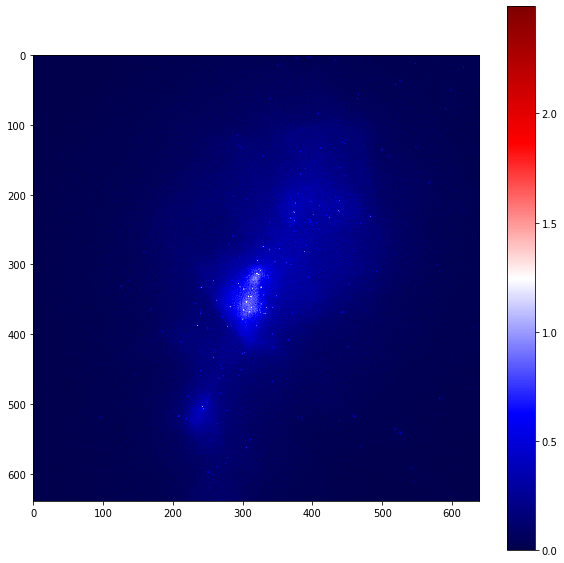

MASA 2D =  14.542263635339049
15.325815215015327
123000000000001
[500909.3940258  500907.53734112 499996.98549509]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
VEL  363952740
ID   121317580
MASS 121317580
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_123
MASA 3D: 15.253688592322257
15.325815215015327


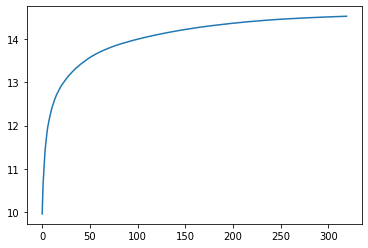

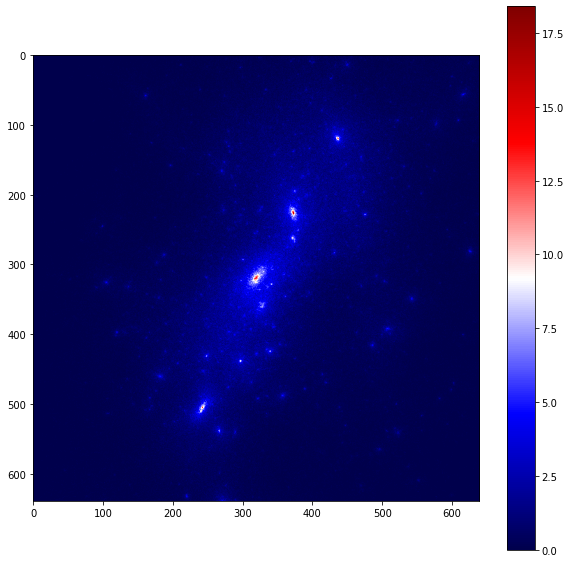

MASA 2D =  15.321547741963633
15.325815215015327
123000000000001
[500909.3940258  500907.53734112 499996.98549509]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
VEL  363952740
ID   121317580
MASS 121317580
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_123
MASA 3D: 13.34800164762485
15.325815215015327


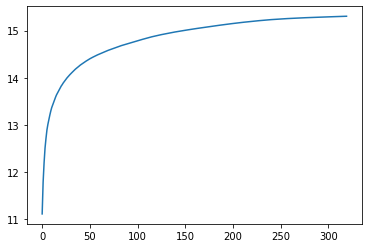

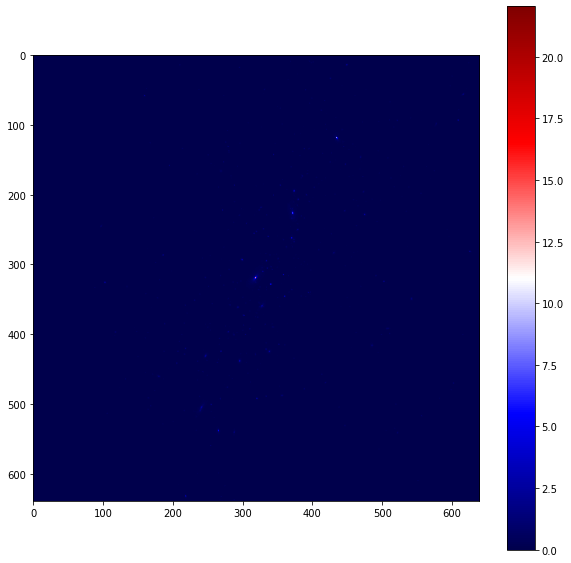

MASA 2D =  13.4140030891463
15.325815215015327
123000000000001
[500909.3940258  500907.53734112 499996.98549509]


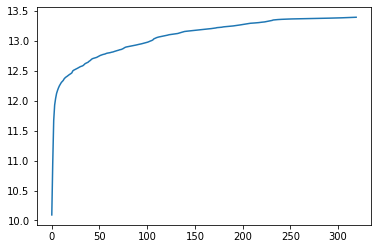

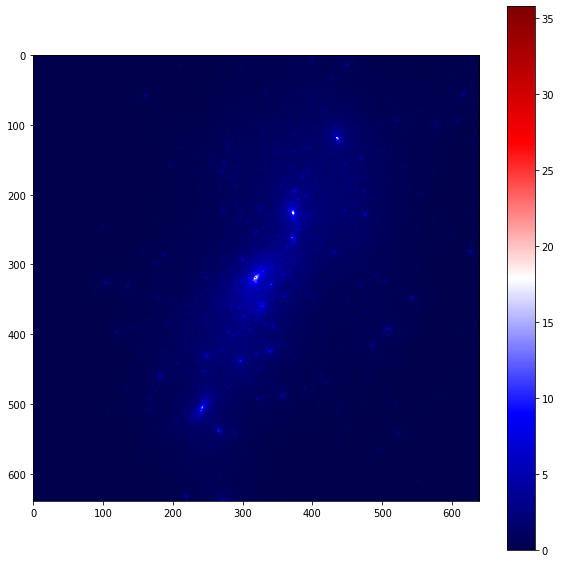

MASA 2D tot = 15.392915992867485
MASA 3D tot = 15.325761625405056
MASA 2D CIL = 15.374458184919884
20 124 124000000000001
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
VEL  364051296
ID   121350432
MASS 121350432
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_124
MASA 3D: 14.50161130519291
15.352869125452049


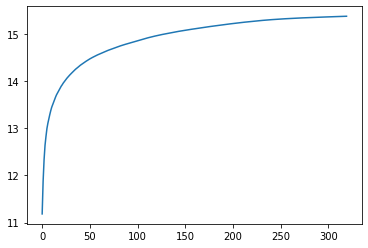

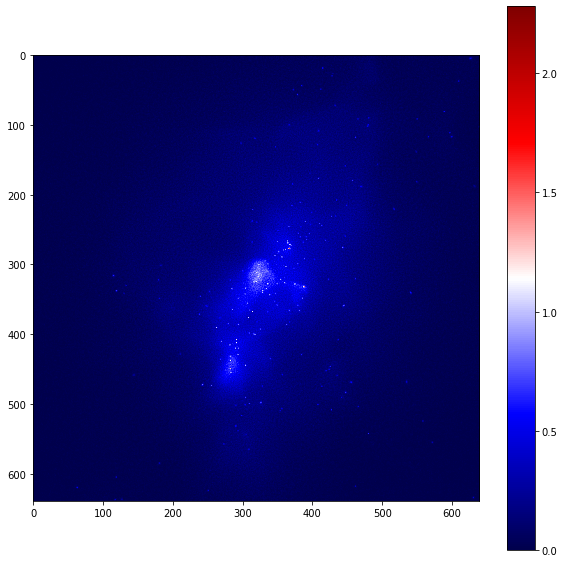

MASA 2D =  14.564787081151705
15.352869125452049
124000000000001
[500827.4283674  500830.27945624 499985.29420959]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
VEL  364051296
ID   121350432
MASS 121350432
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_124
MASA 3D: 15.281364184698011
15.352869125452049


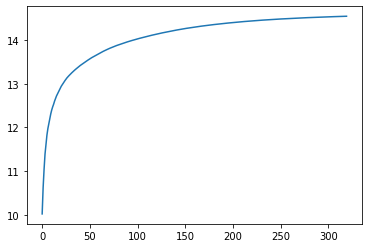

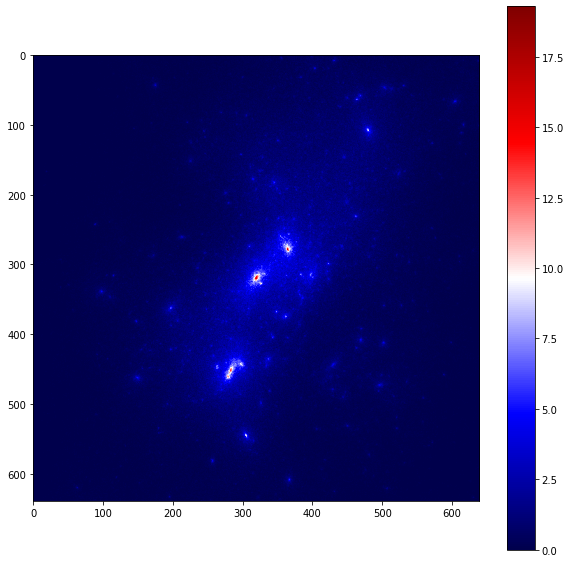

MASA 2D =  15.348133473025413
15.352869125452049
124000000000001
[500827.4283674  500830.27945624 499985.29420959]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
VEL  364051296
ID   121350432
MASS 121350432
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_124
MASA 3D: 13.381601703390212
15.352869125452049


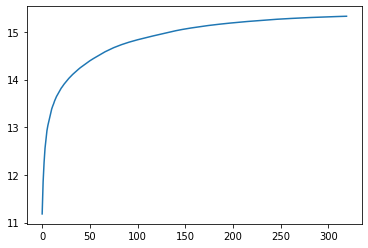

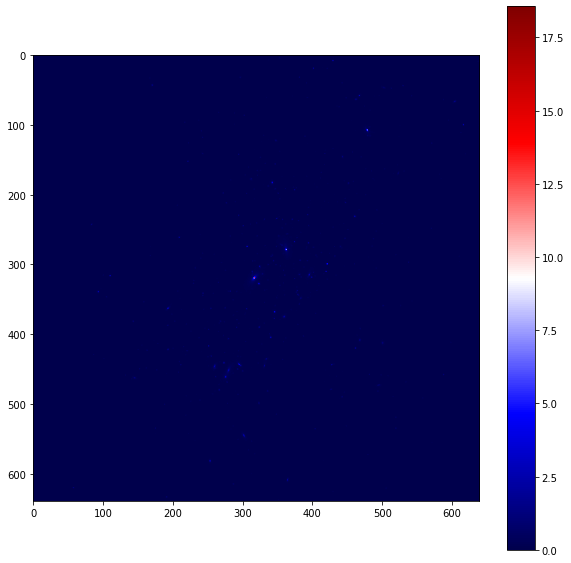

MASA 2D =  13.439766876688665
15.352869125452049
124000000000001
[500827.4283674  500830.27945624 499985.29420959]


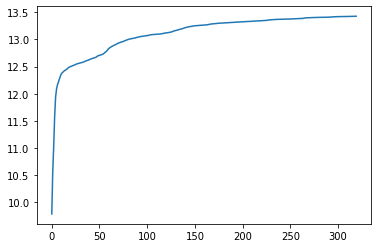

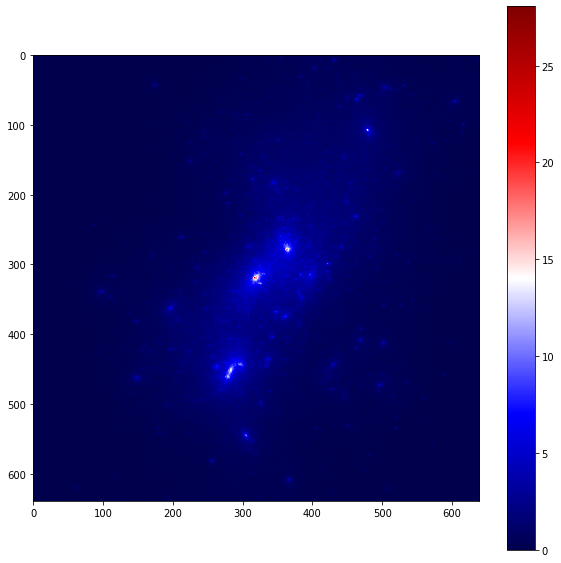

MASA 2D tot = 15.41892243707161
MASA 3D tot = 15.35274878432684
MASA 2D CIL = 15.400046263427006
901 124 124000000000002
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
VEL  364051296
ID   121350432
MASS 121350432
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_124
MASA 3D: 13.822204772768547
14.68983076453446


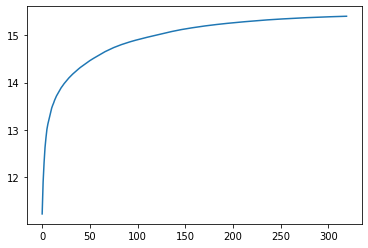

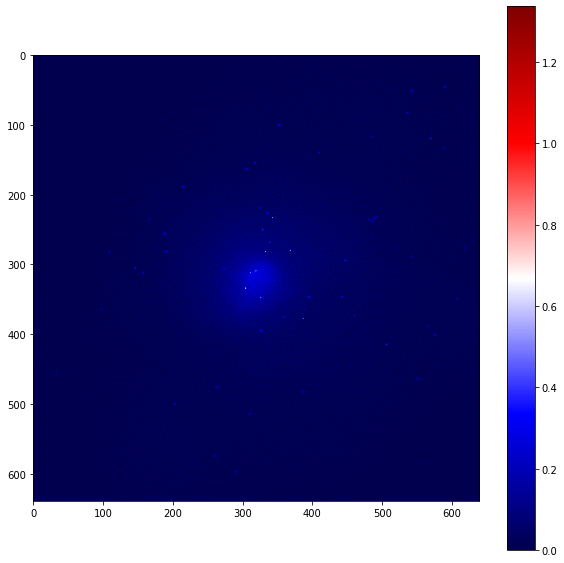

MASA 2D =  13.914844788428075
14.68983076453446
124000000000002
[501223.97573583 496748.88081185 502266.771831  ]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
VEL  364051296
ID   121350432
MASS 121350432
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_124
MASA 3D: 14.63031824664806
14.68983076453446


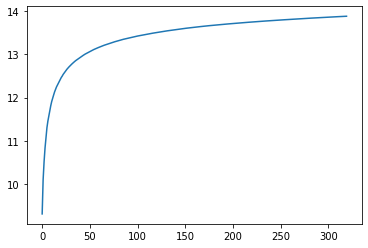

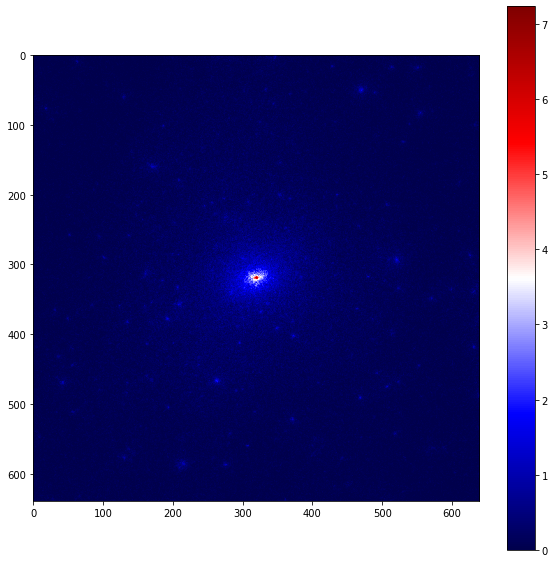

MASA 2D =  14.72350883074894
14.68983076453446
124000000000002
[501223.97573583 496748.88081185 502266.771831  ]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364051296
VEL  364051296
ID   121350432
MASS 121350432
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_124
MASA 3D: 12.729386978179662
14.68983076453446


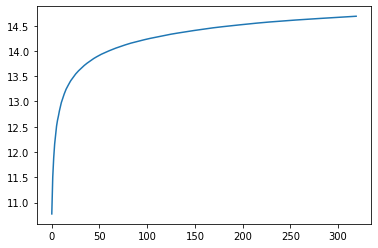

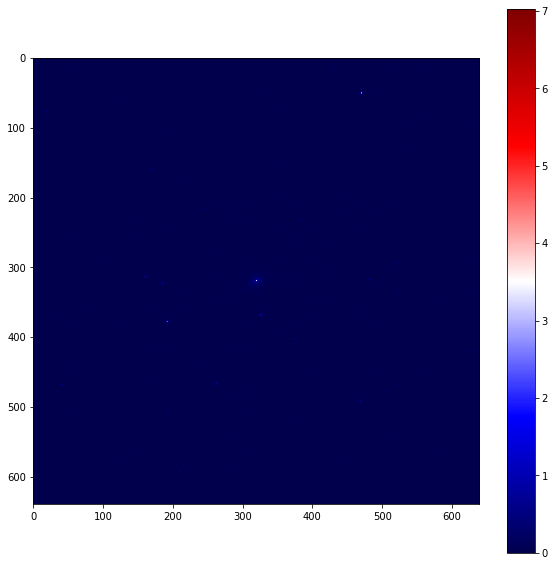

MASA 2D =  12.811948267432056
14.68983076453446
124000000000002
[501223.97573583 496748.88081185 502266.771831  ]


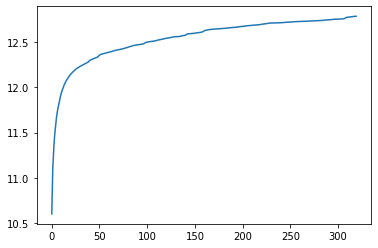

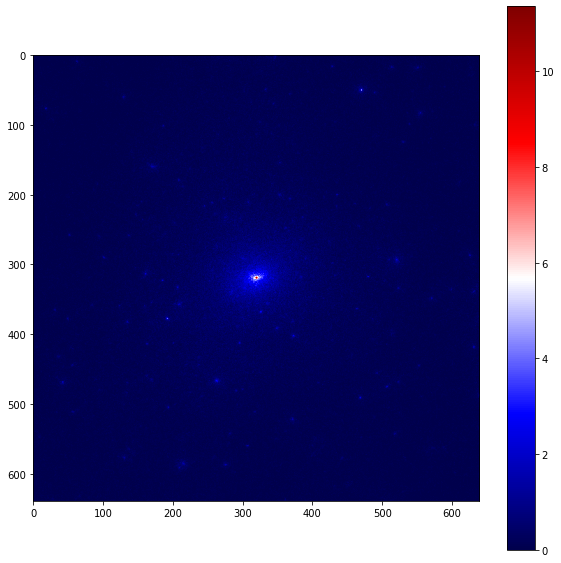

MASA 2D tot = 14.790809387193743
MASA 3D tot = 14.697805037684489
MASA 2D CIL = 14.753949725222881
43 125 125000000000001
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
VEL  364152048
ID   121384016
MASS 121384016
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_125
MASA 3D: 14.526736451744581
15.380719430723204


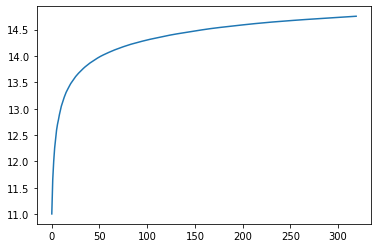

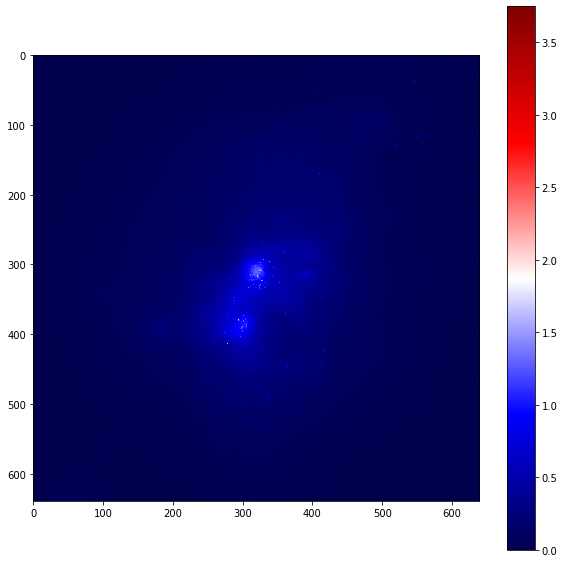

MASA 2D =  14.582245652210291
15.380719430723204
125000000000001
[500768.29693407 500710.14662196 500143.37862422]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
VEL  364152048
ID   121384016
MASS 121384016
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_125
MASA 3D: 15.30969499407826
15.380719430723204


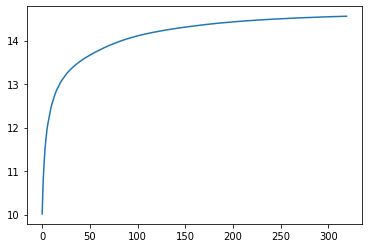

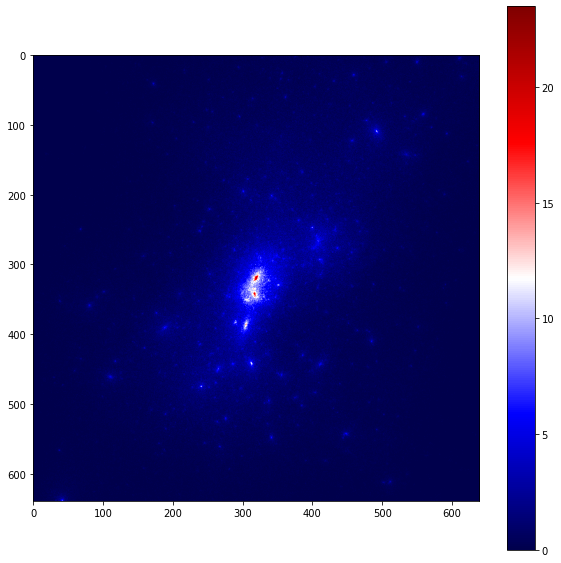

MASA 2D =  15.366588010296606
15.380719430723204
125000000000001
[500768.29693407 500710.14662196 500143.37862422]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
VEL  364152048
ID   121384016
MASS 121384016
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_125
MASA 3D: 13.404430410775614
15.380719430723204


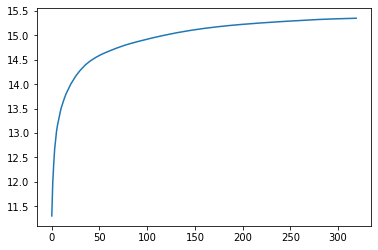

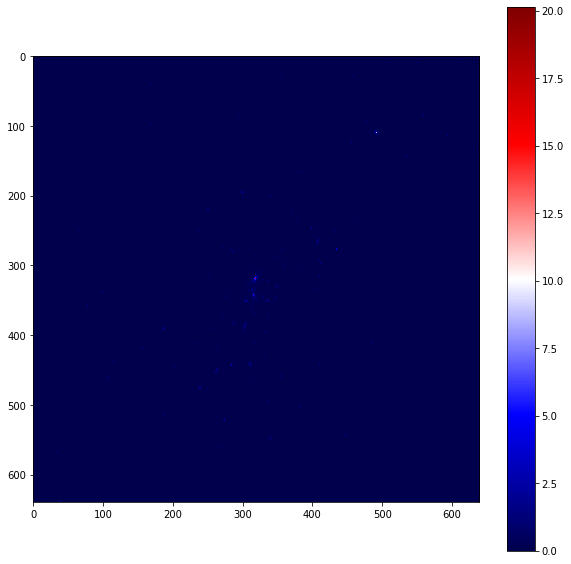

MASA 2D =  13.454590923588498
15.380719430723204
125000000000001
[500768.29693407 500710.14662196 500143.37862422]


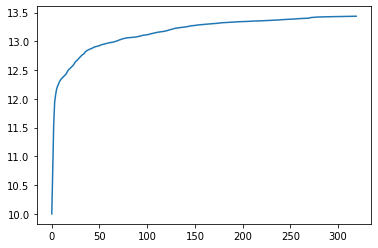

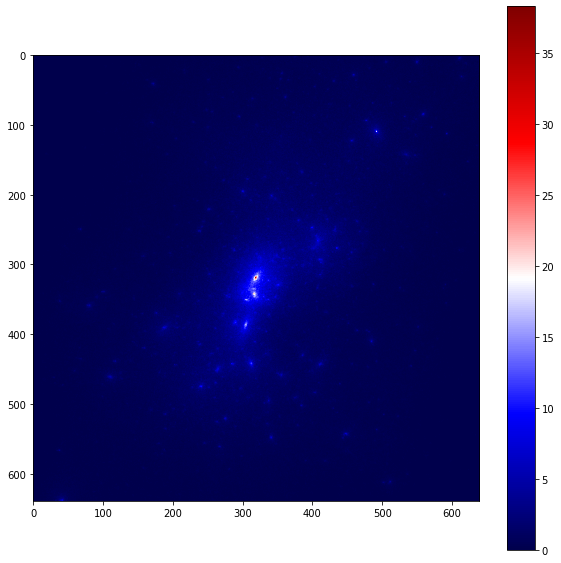

MASA 2D tot = 15.437199816020911
MASA 3D tot = 15.38057090146431
MASA 2D CIL = 15.417262719343466
868 125 125000000000002
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
VEL  364152048
ID   121384016
MASS 121384016
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_125
MASA 3D: 13.820349682197424
14.696652516784368


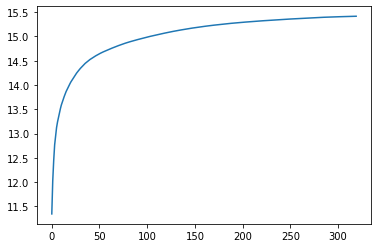

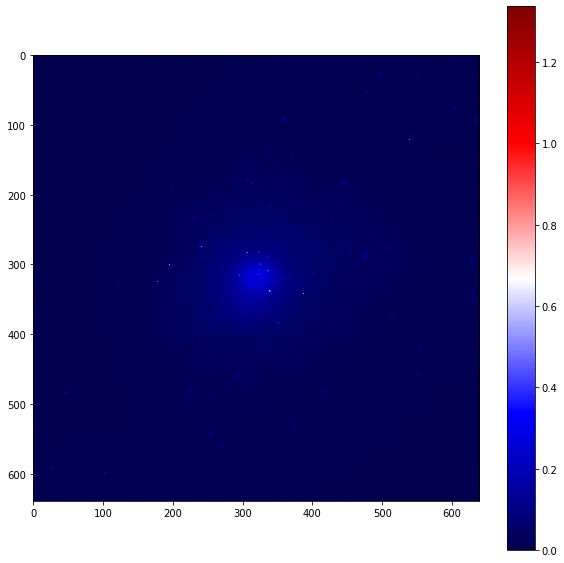

MASA 2D =  13.916242217937093
14.696652516784368
125000000000002
[501147.80658176 496996.84795772 501911.1736089 ]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
VEL  364152048
ID   121384016
MASS 121384016
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_125
MASA 3D: 14.64097755326623
14.696652516784368


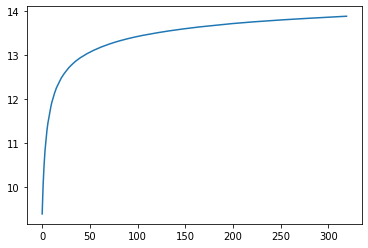

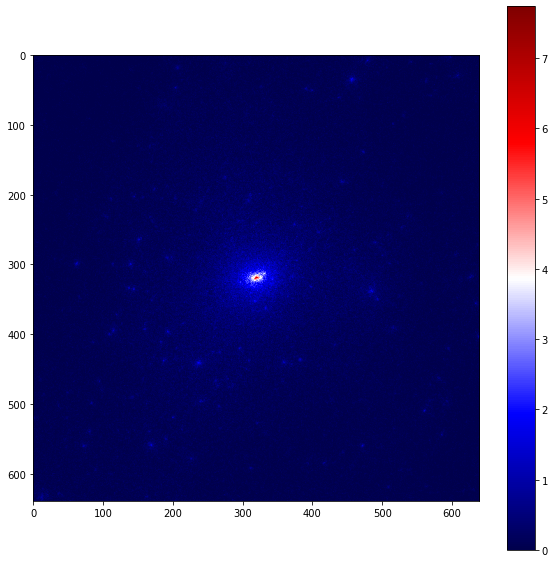

MASA 2D =  14.731419511493007
14.696652516784368
125000000000002
[501147.80658176 496996.84795772 501911.1736089 ]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364152048
VEL  364152048
ID   121384016
MASS 121384016
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_125
MASA 3D: 12.737819333947778
14.696652516784368


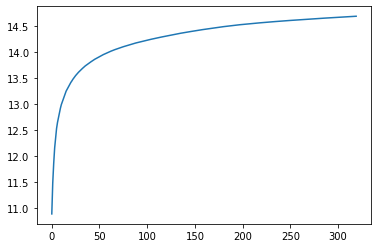

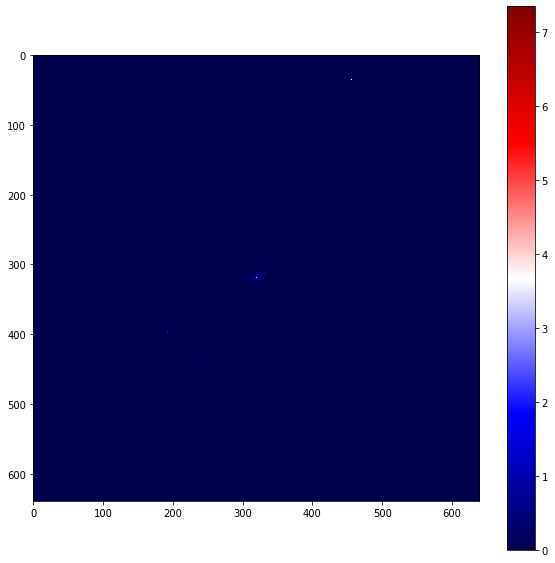

MASA 2D =  12.819888640935185
14.696652516784368
125000000000002
[501147.80658176 496996.84795772 501911.1736089 ]


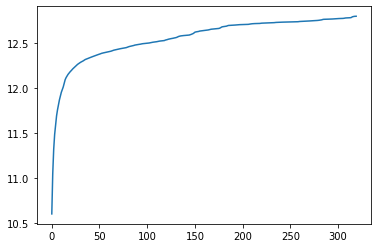

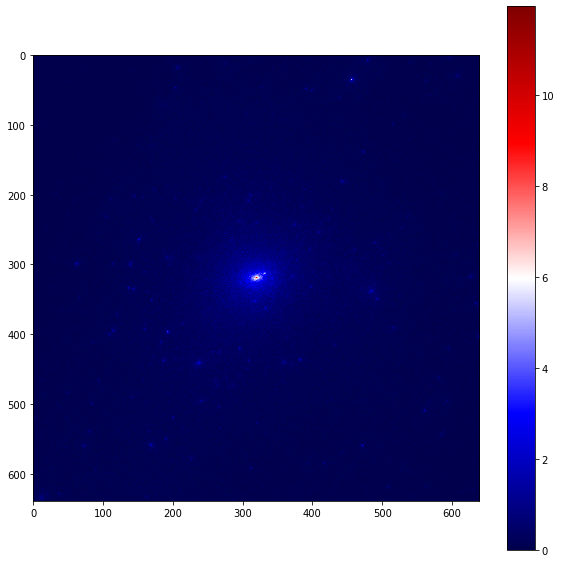

MASA 2D tot = 14.797859364520832
MASA 3D tot = 14.706794515294908
MASA 2D CIL = 14.759067846395261
69 126 126000000000001
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
VEL  364255188
ID   121418396
MASS 121418396
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_126
MASA 3D: 14.533922371336125
15.389465555650354


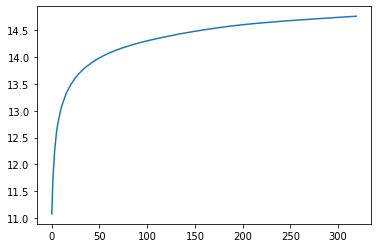

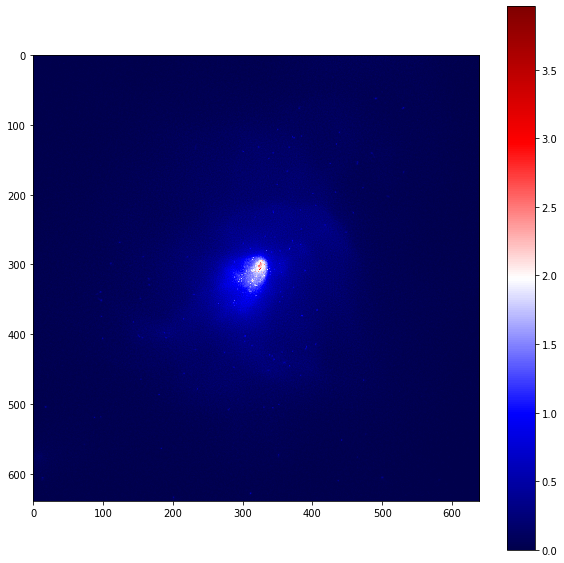

MASA 2D =  14.590349813106526
15.389465555650354
126000000000001
[500670.46880223 500669.38463128 500291.71591998]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
VEL  364255188
ID   121418396
MASS 121418396
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_126
MASA 3D: 15.31869112684979
15.389465555650354


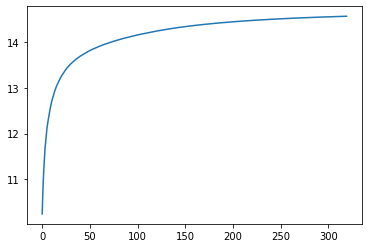

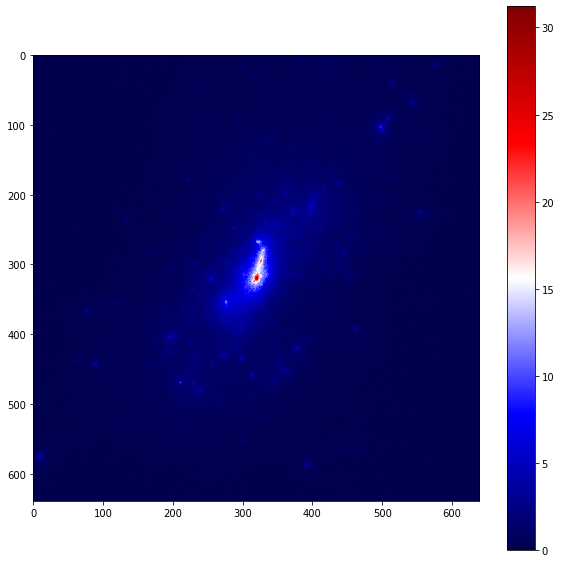

MASA 2D =  15.3747868540487
15.389465555650354
126000000000001
[500670.46880223 500669.38463128 500291.71591998]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
VEL  364255188
ID   121418396
MASS 121418396
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_126
MASA 3D: 13.413057795171278
15.389465555650354


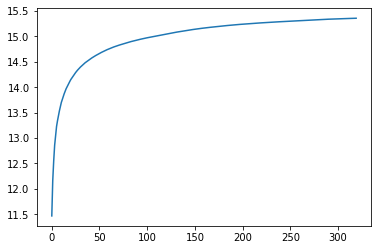

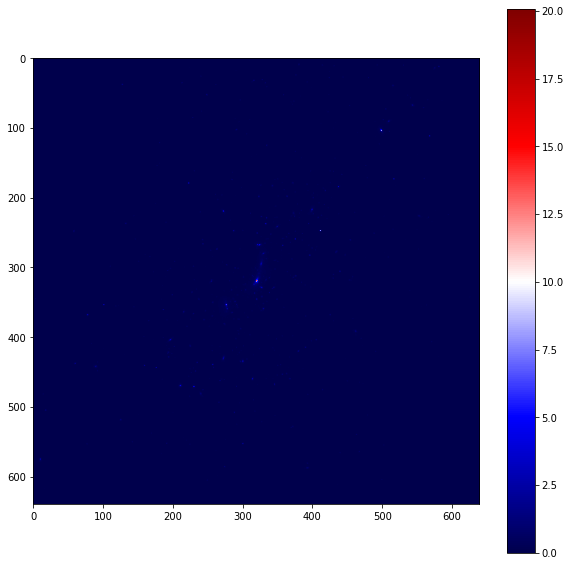

MASA 2D =  13.459716894058346
15.389465555650354
126000000000001
[500670.46880223 500669.38463128 500291.71591998]


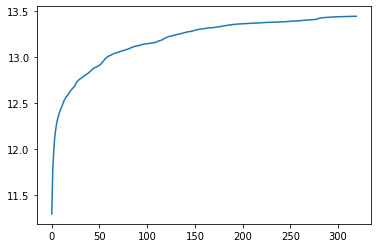

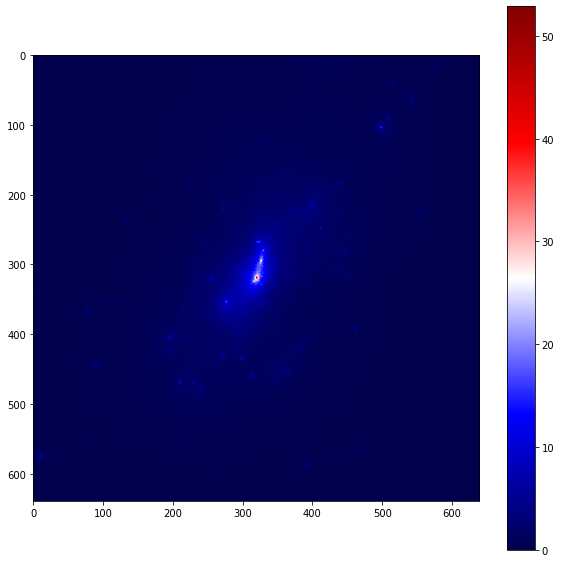

MASA 2D tot = 15.445353564930233
MASA 3D tot = 15.389310139932352
MASA 2D CIL = 15.423536344678297
770 126 126000000000002
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
VEL  364255188
ID   121418396
MASS 121418396
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_126
MASA 3D: 13.835705306941385
14.702313330056771


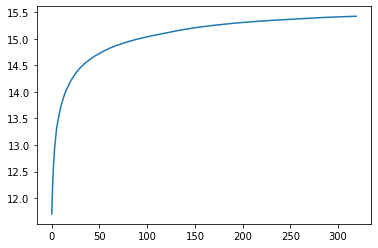

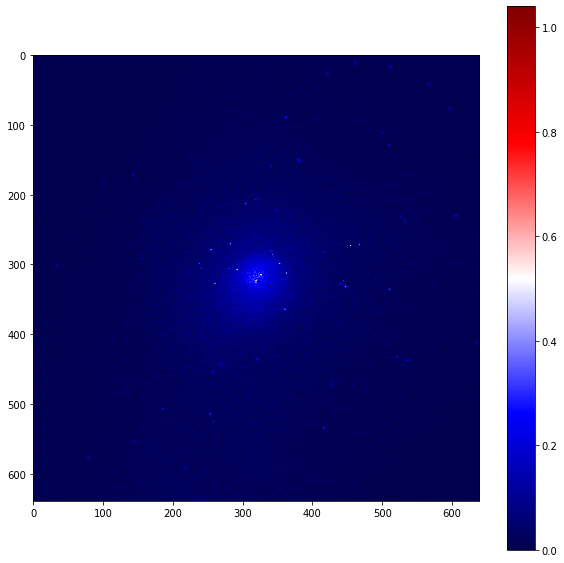

MASA 2D =  13.929705897682727
14.702313330056771
126000000000002
[501070.99632582 497279.56235649 501542.45440518]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
VEL  364255188
ID   121418396
MASS 121418396
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_126
MASA 3D: 14.659667153267641
14.702313330056771


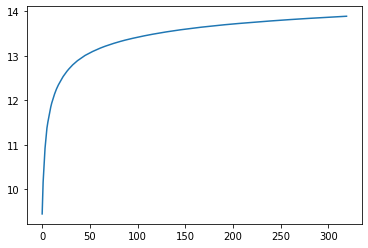

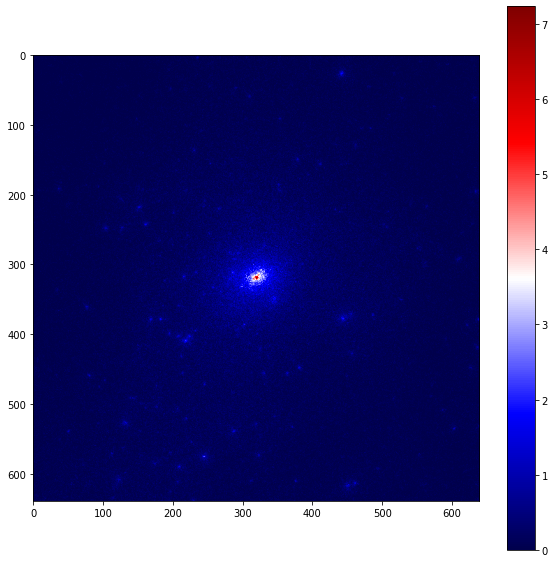

MASA 2D =  14.754122124781217
14.702313330056771
126000000000002
[501070.99632582 497279.56235649 501542.45440518]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364255188
VEL  364255188
ID   121418396
MASS 121418396
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_126
MASA 3D: 12.759406796792195
14.702313330056771


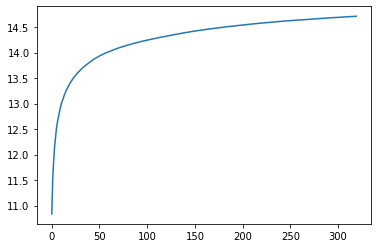

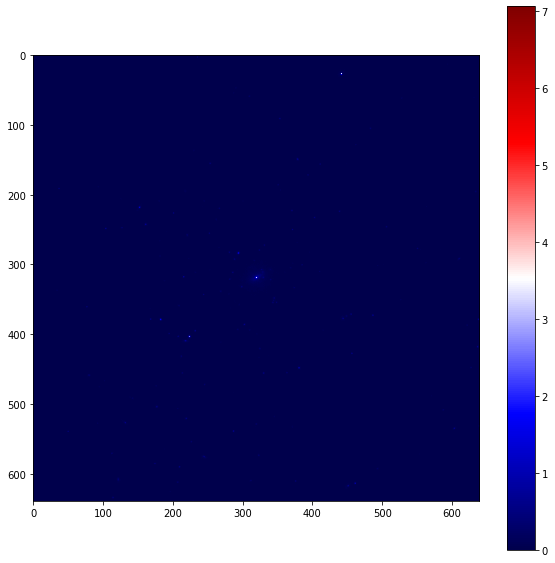

MASA 2D =  12.839242754889948
14.702313330056771
126000000000002
[501070.99632582 497279.56235649 501542.45440518]


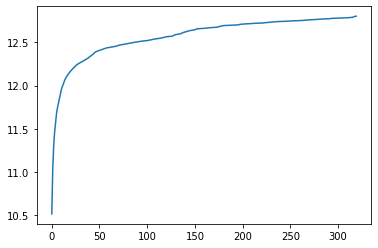

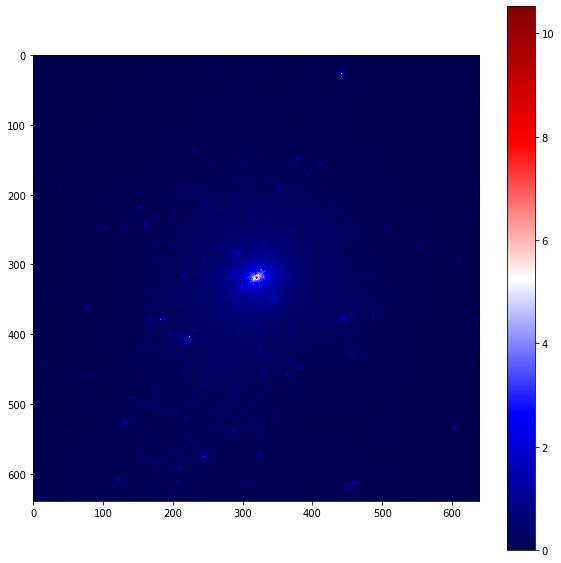

MASA 2D tot = 14.819324538304523
MASA 3D tot = 14.72508378776643
MASA 2D CIL = 14.778062540864267
99 127 127000000000001
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
VEL  364353720
ID   121451240
MASS 121451240
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_127
MASA 3D: 14.542066167701611
15.40079003152738


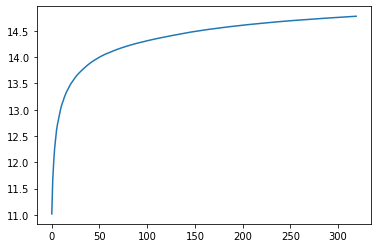

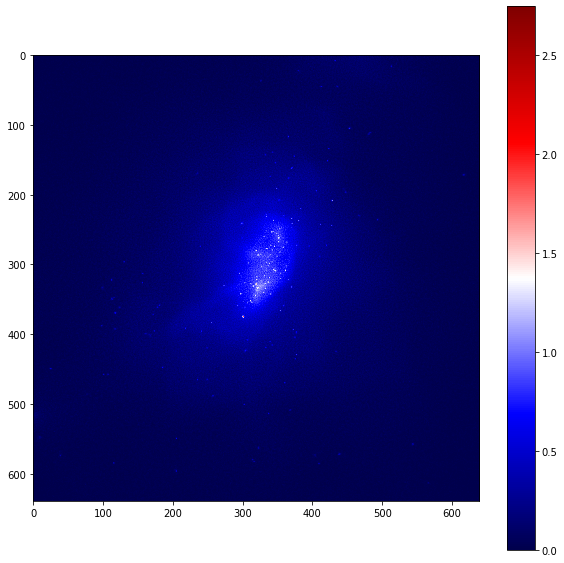

MASA 2D =  14.600987906326537
15.40079003152738
127000000000001
[500470.79523404 500567.48522653 500330.11635145]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
VEL  364353720
ID   121451240
MASS 121451240
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_127
MASA 3D: 15.330678911371406
15.40079003152738


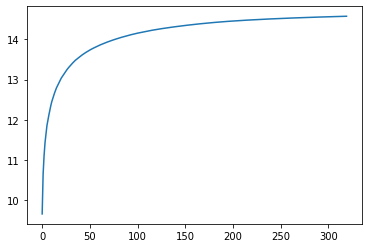

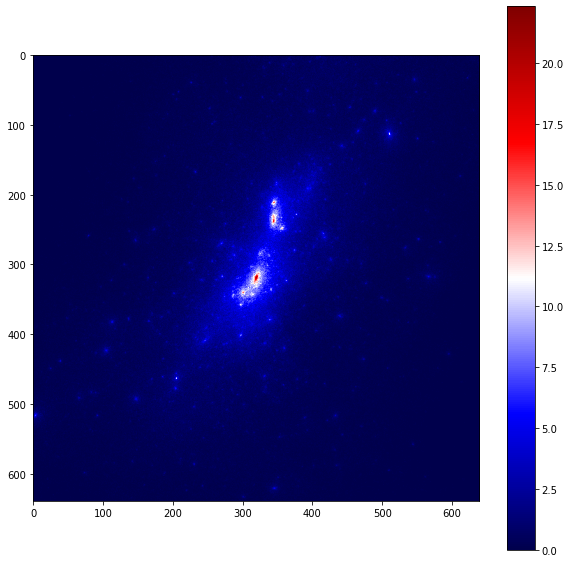

MASA 2D =  15.388009006253183
15.40079003152738
127000000000001
[500470.79523404 500567.48522653 500330.11635145]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
VEL  364353720
ID   121451240
MASS 121451240
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_127
MASA 3D: 13.420510896402721
15.40079003152738


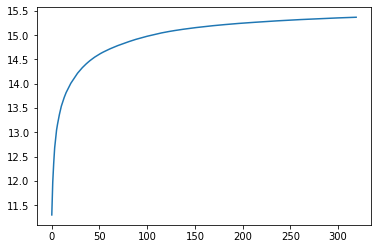

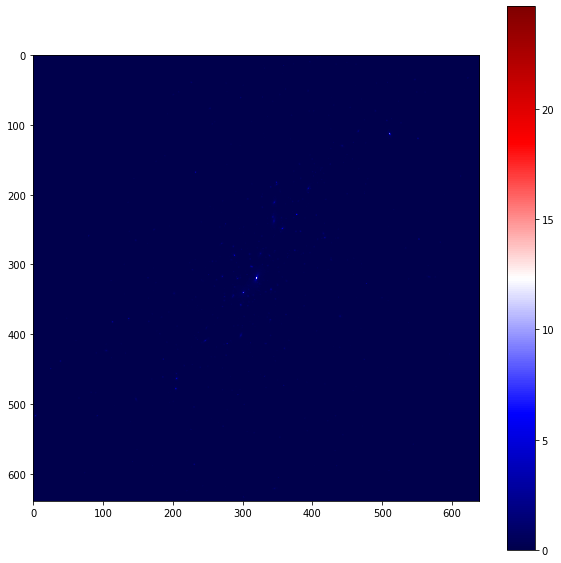

MASA 2D =  13.467808549538224
15.40079003152738
127000000000001
[500470.79523404 500567.48522653 500330.11635145]


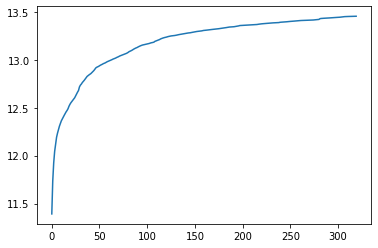

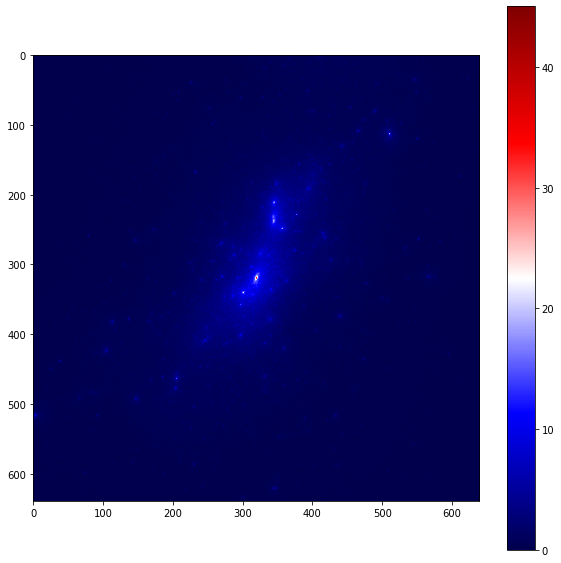

MASA 2D tot = 15.458163047635882
MASA 3D tot = 15.400715971478851
MASA 2D CIL = 15.436061910909942
664 127 127000000000002
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
VEL  364353720
ID   121451240
MASS 121451240
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_127
MASA 3D: 13.860854973673483
14.713298134063349


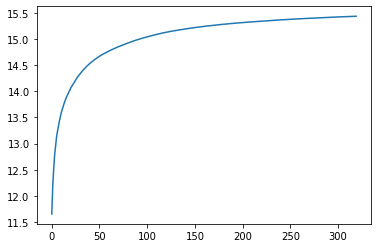

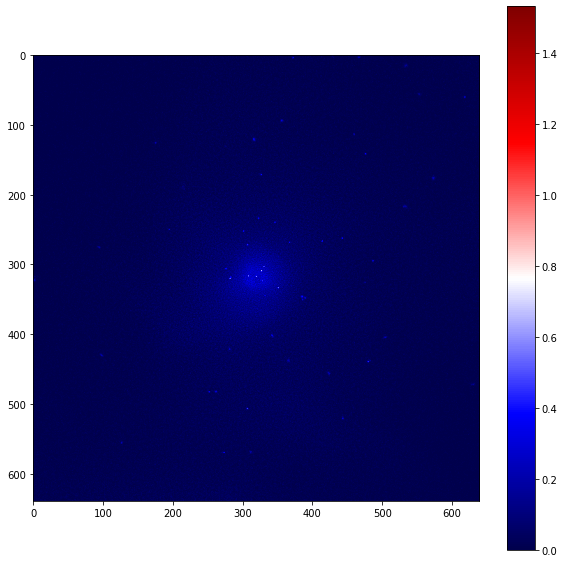

MASA 2D =  13.954993693002406
14.713298134063349
127000000000002
[500996.45842586 497612.7609872  501174.11158587]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
VEL  364353720
ID   121451240
MASS 121451240
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_127
MASA 3D: 14.686987741610263
14.713298134063349


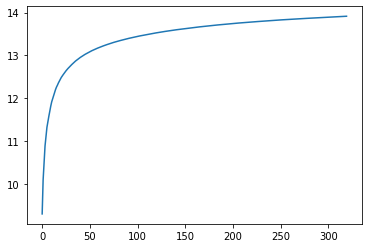

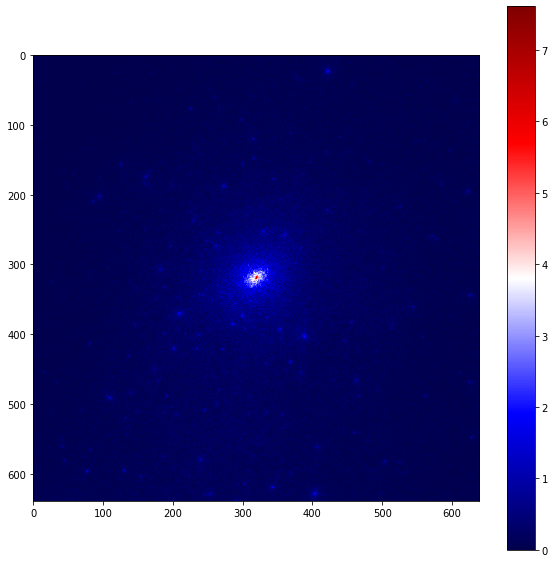

MASA 2D =  14.777023119115068
14.713298134063349
127000000000002
[500996.45842586 497612.7609872  501174.11158587]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
VEL  364353720
ID   121451240
MASS 121451240
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_127
MASA 3D: 12.79332809467417
14.713298134063349


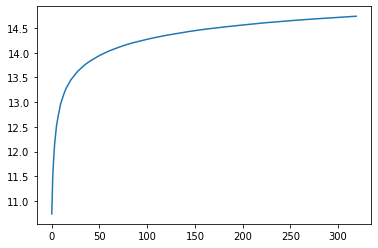

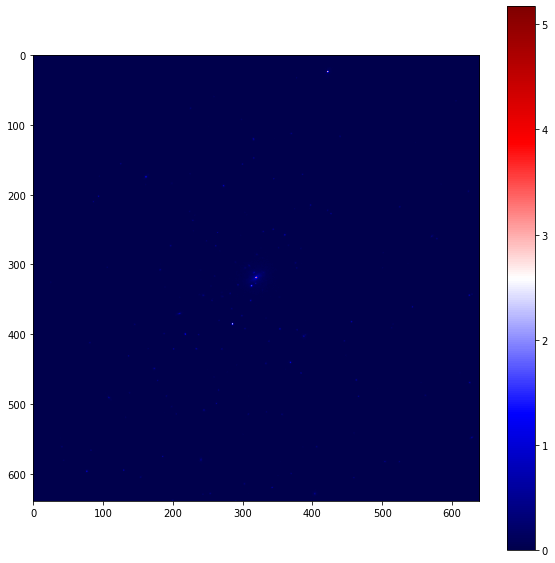

MASA 2D =  12.84476573552127
14.713298134063349
127000000000002
[500996.45842586 497612.7609872  501174.11158587]


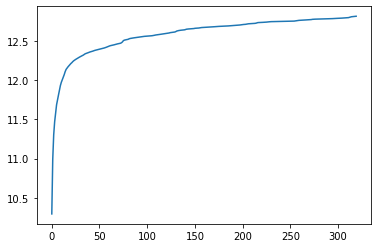

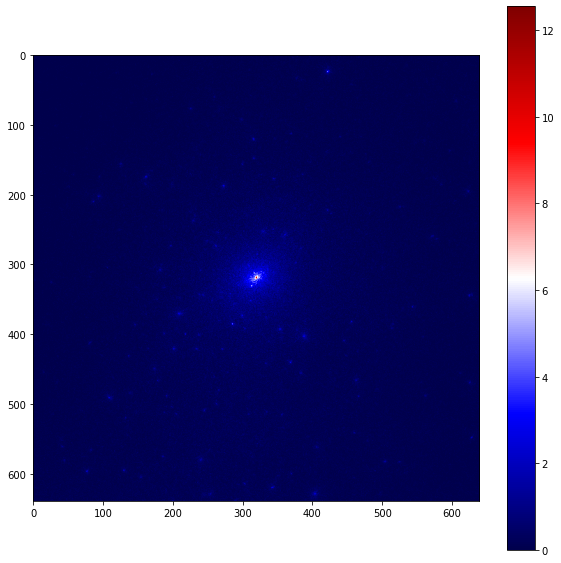

MASA 2D tot = 14.842355766054128
MASA 3D tot = 14.752196937054796
MASA 2D CIL = 14.802907993064427
1475 127 127000000000003
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
VEL  364353720
ID   121451240
MASS 121451240
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_127
MASA 3D: 13.366665456331619
14.20001556619629


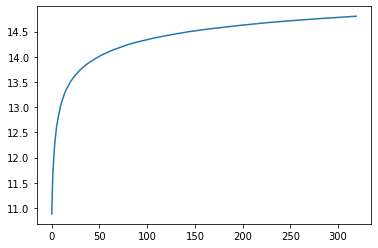

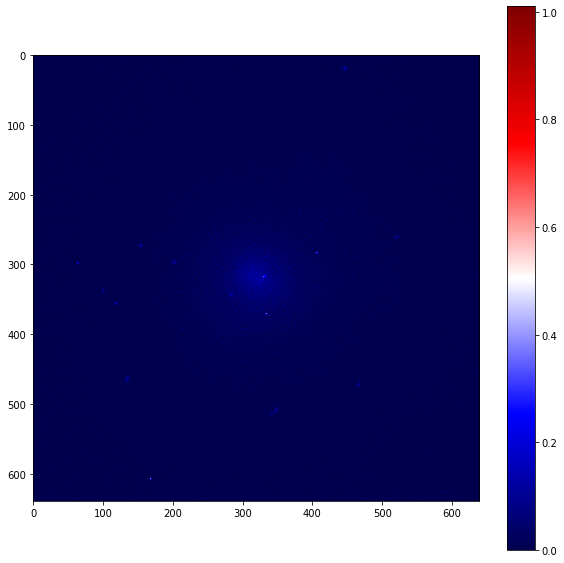

MASA 2D =  13.441788874280089
14.20001556619629
127000000000003
[496329.48787733 502998.83066923 499224.58930262]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
VEL  364353720
ID   121451240
MASS 121451240
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_127
MASA 3D: 14.144467086182512
14.20001556619629


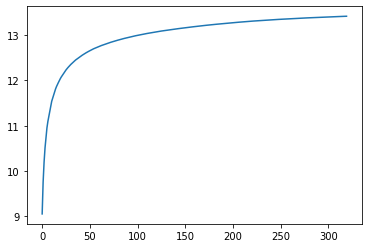

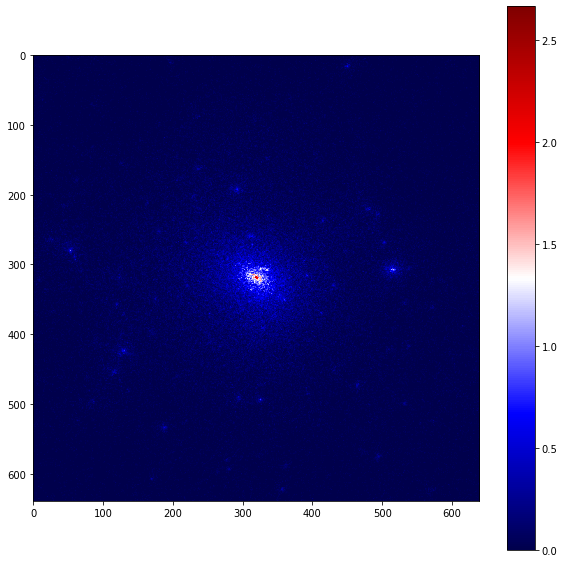

MASA 2D =  14.205320117230245
14.20001556619629
127000000000003
[496329.48787733 502998.83066923 499224.58930262]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364353720
VEL  364353720
ID   121451240
MASS 121451240
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_127
MASA 3D: 12.338671598794251
14.20001556619629


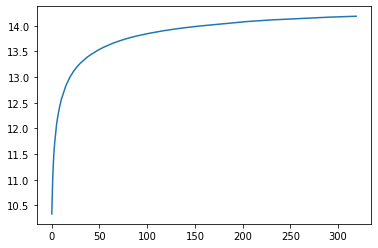

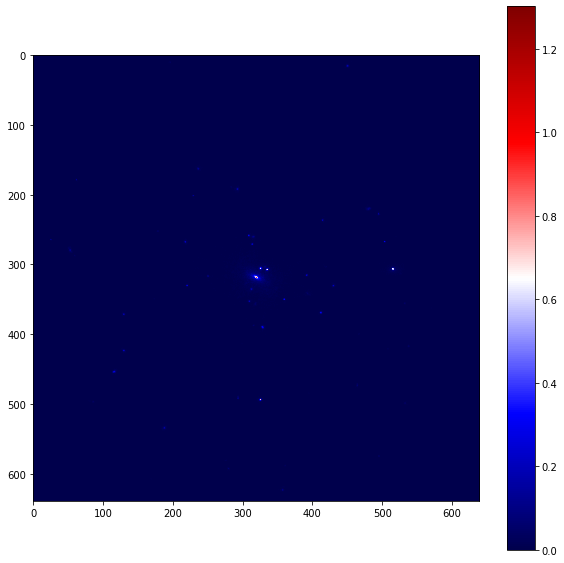

MASA 2D =  12.355175629494617
14.20001556619629
127000000000003
[496329.48787733 502998.83066923 499224.58930262]


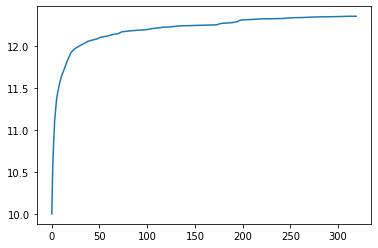

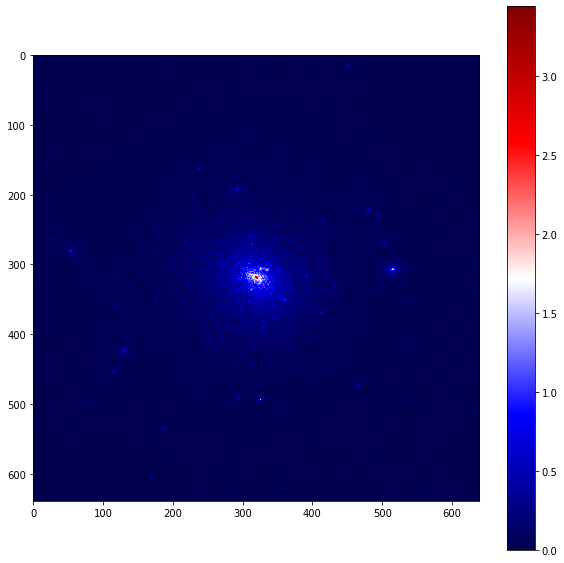

MASA 2D tot = 14.279585475098061
MASA 3D tot = 14.21724610039469
MASA 2D CIL = 14.260750011063838
134 128 128000000000001
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
VEL  364441476
ID   121480492
MASS 121480492
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_128
MASA 3D: 14.559765370368877
15.418523354615937


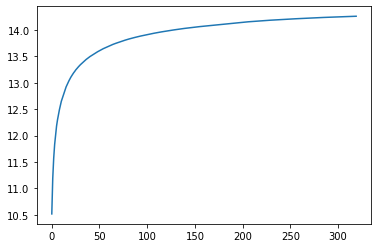

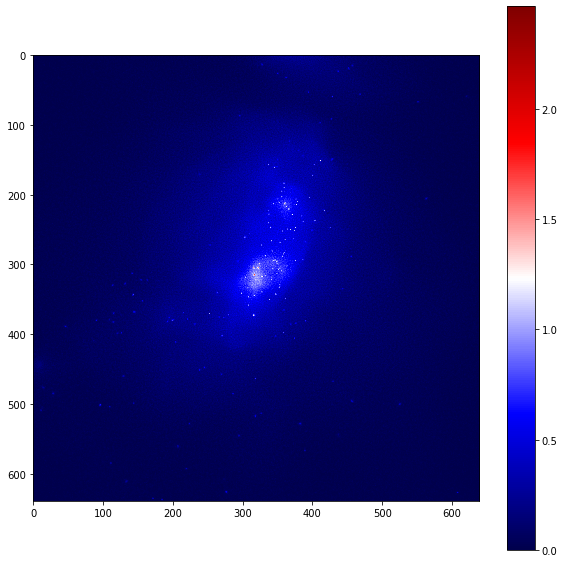

MASA 2D =  14.618230621198789
15.418523354615937
128000000000001
[500385.17374248 500526.9191025  500364.07676829]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
VEL  364441476
ID   121480492
MASS 121480492
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_128
MASA 3D: 15.349589412802196
15.418523354615937


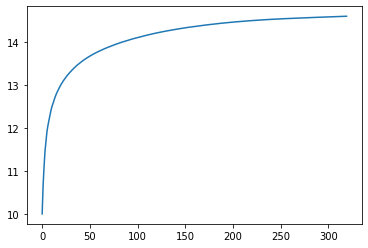

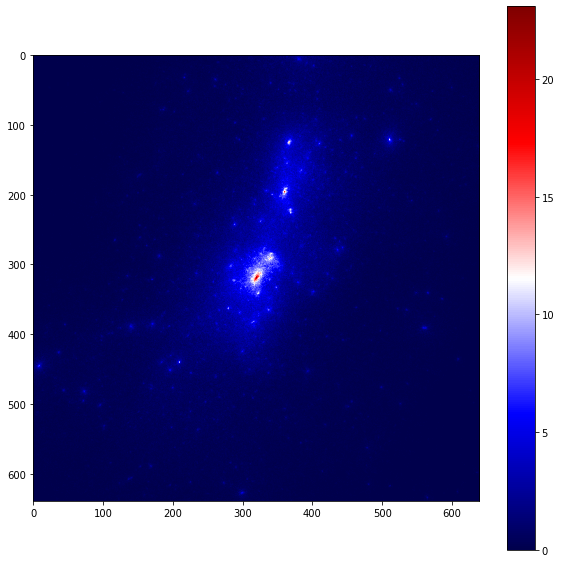

MASA 2D =  15.407958893475419
15.418523354615937
128000000000001
[500385.17374248 500526.9191025  500364.07676829]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
VEL  364441476
ID   121480492
MASS 121480492
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_128
MASA 3D: 13.442868916040986
15.418523354615937


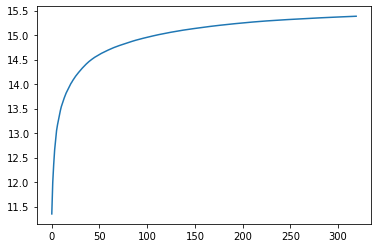

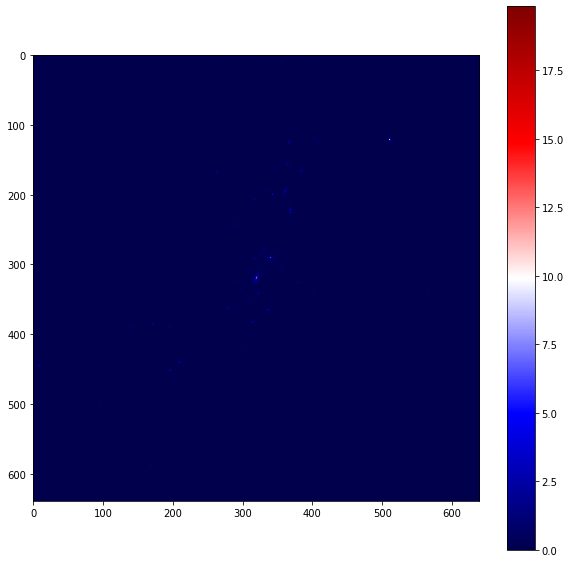

MASA 2D =  13.483945938972605
15.418523354615937
128000000000001
[500385.17374248 500526.9191025  500364.07676829]


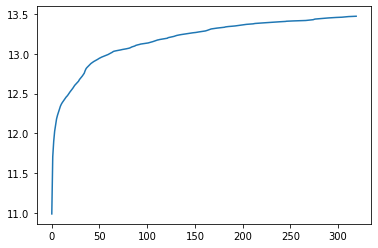

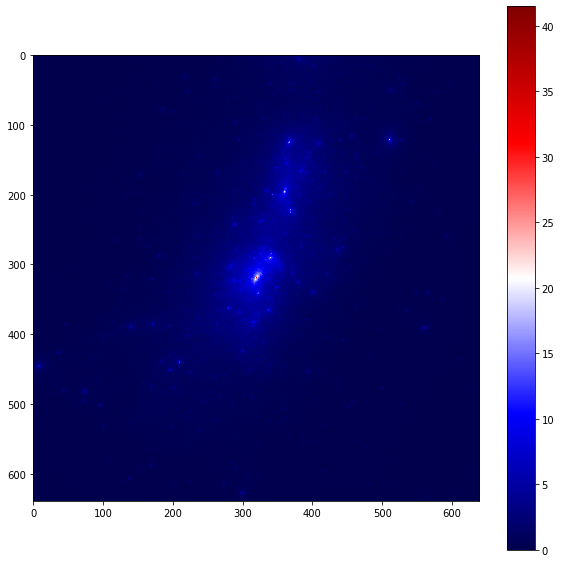

MASA 2D tot = 15.477698964492813
MASA 3D tot = 15.41949518683916
MASA 2D CIL = 15.455481660322517
1373 128 128000000000003
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
VEL  364441476
ID   121480492
MASS 121480492
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_128
MASA 3D: 13.375580434673903
14.20185303071639


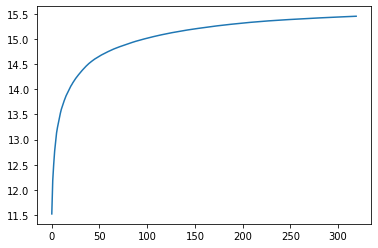

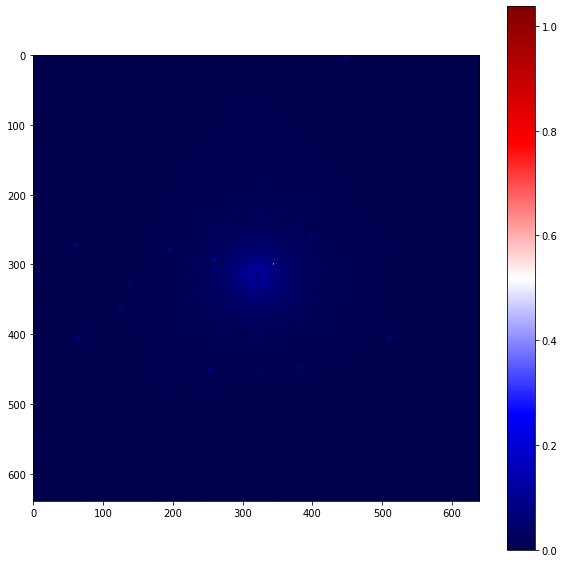

MASA 2D =  13.448154491837473
14.20185303071639
128000000000003
[496629.24139363 502834.66539565 499488.89051273]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
VEL  364441476
ID   121480492
MASS 121480492
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_128
MASA 3D: 14.141377499295725
14.20185303071639


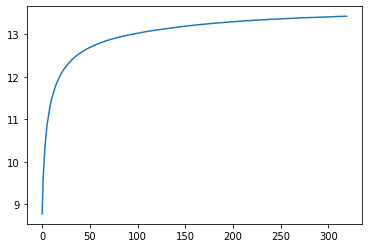

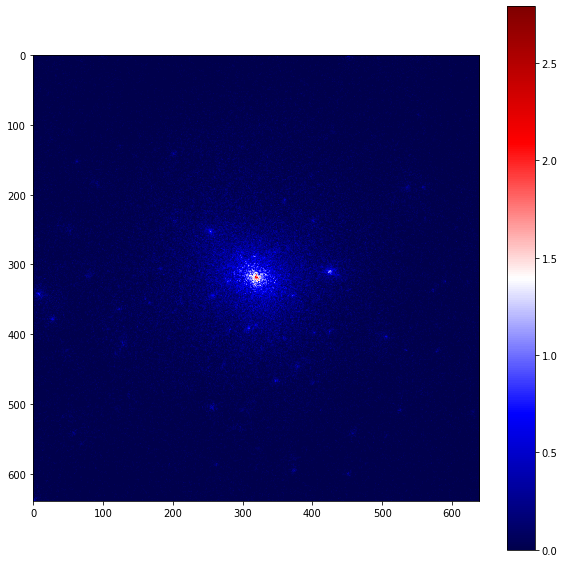

MASA 2D =  14.201895393246367
14.20185303071639
128000000000003
[496629.24139363 502834.66539565 499488.89051273]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
VEL  364441476
ID   121480492
MASS 121480492
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_128
MASA 3D: 12.336383717404289
14.20185303071639


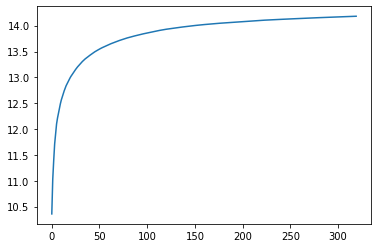

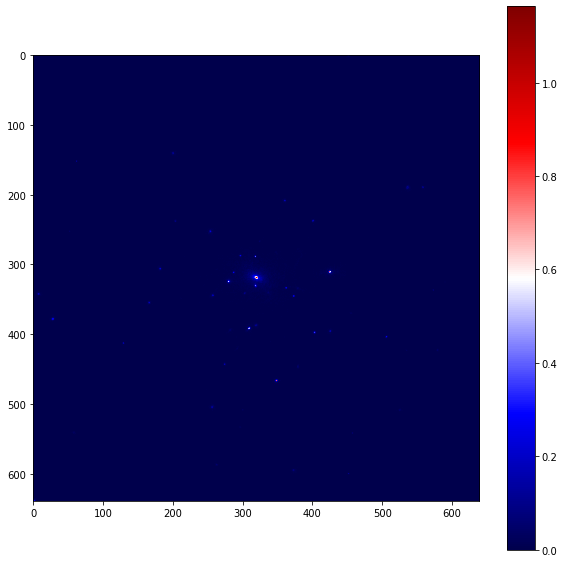

MASA 2D =  12.354751241690828
14.20185303071639
128000000000003
[496629.24139363 502834.66539565 499488.89051273]


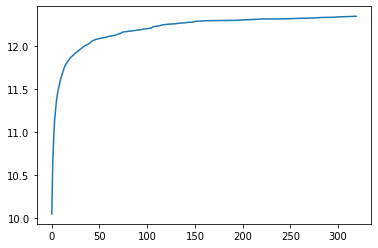

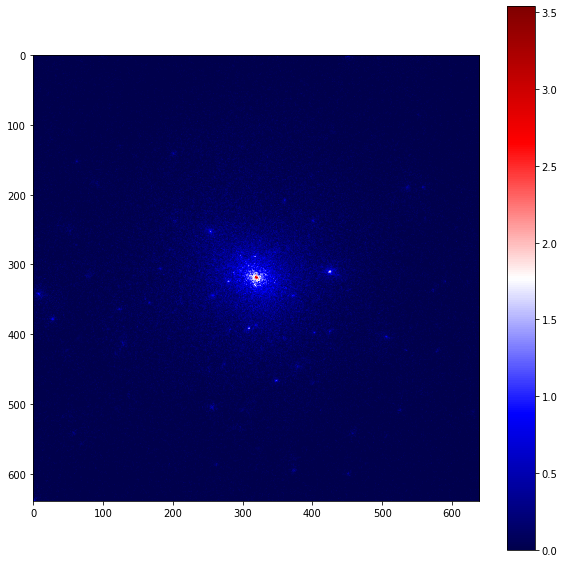

MASA 2D tot = 14.277632571378524
MASA 3D tot = 14.21588074516782
MASA 2D CIL = 14.257559828310438
1674 128 128000000000005
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
PARTICLE TYPE =  0
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
VEL  364441476
ID   121480492
MASS 121480492
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_128
MASA 3D: 13.19827602097114
14.070263271621695


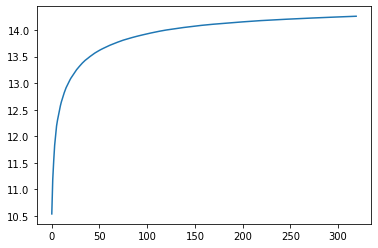

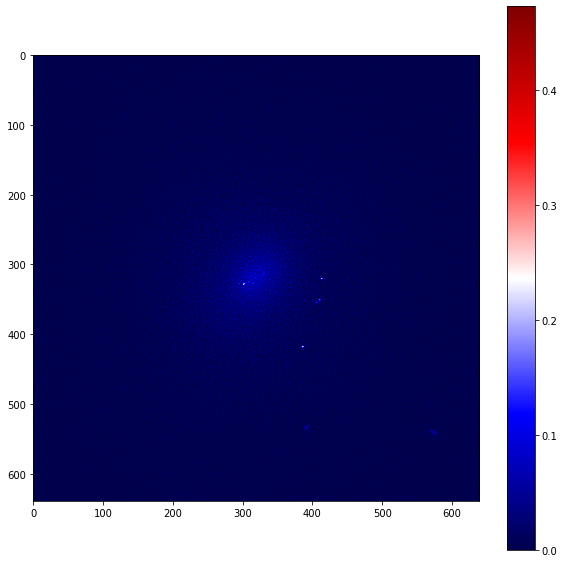

MASA 2D =  13.256343479075804
14.070263271621695
128000000000005
[501031.75510457 491396.57133842 502575.18278508]
PARTICLE TYPE =  1
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
VEL  364441476
ID   121480492
MASS 121480492
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_128
MASA 3D: 14.002445466219056
14.070263271621695


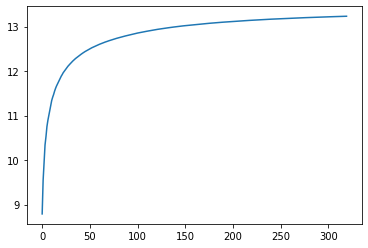

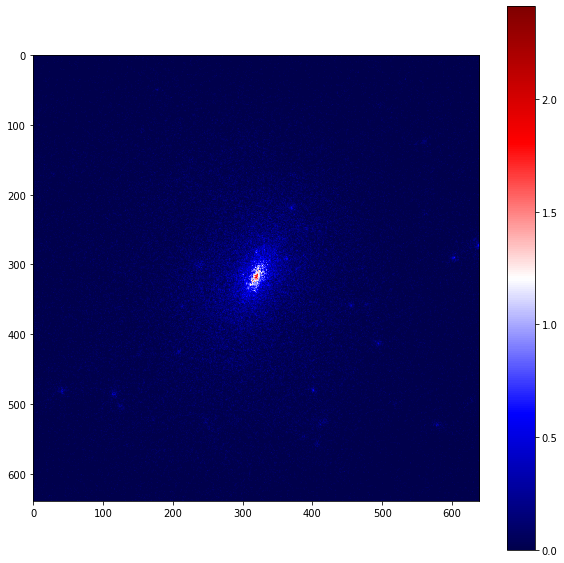

MASA 2D =  14.057931558872754
14.070263271621695
128000000000005
[501031.75510457 491396.57133842 502575.18278508]
PARTICLE TYPE =  4
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  364441476
VEL  364441476
ID   121480492
MASS 121480492
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_128
MASA 3D: 12.179047554360508
14.070263271621695


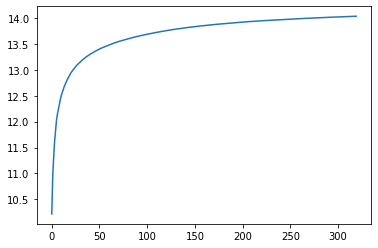

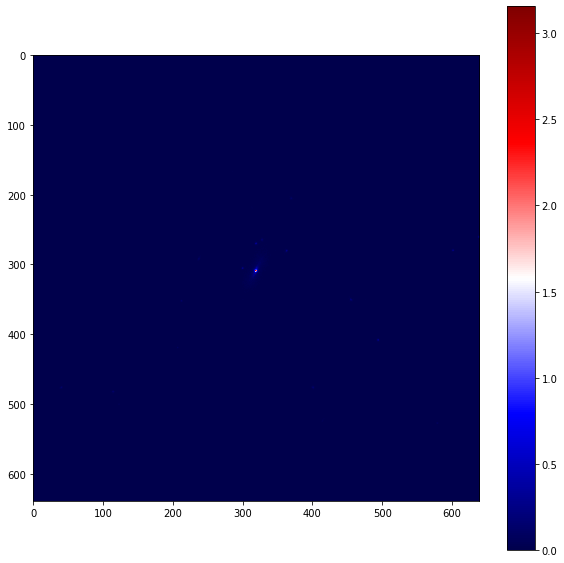

MASA 2D =  12.202104225670992
14.070263271621695
128000000000005
[501031.75510457 491396.57133842 502575.18278508]


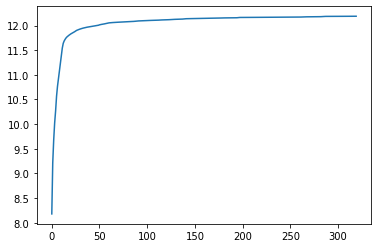

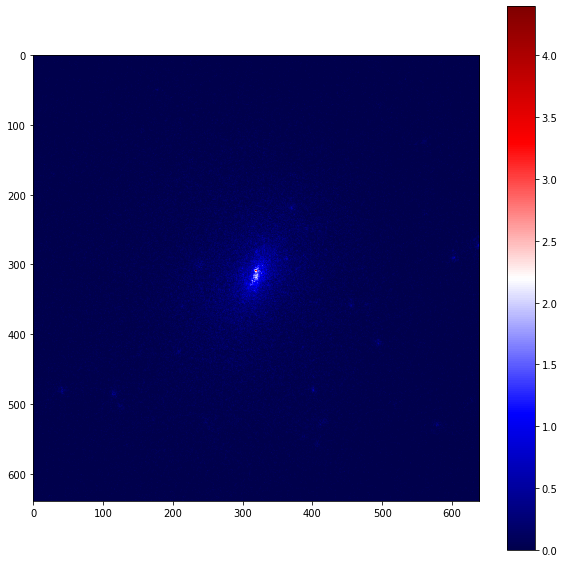

MASA 2D tot = 14.126802819591287
MASA 3D tot = 14.071370364134307
MASA 2D CIL = 14.104776075074085


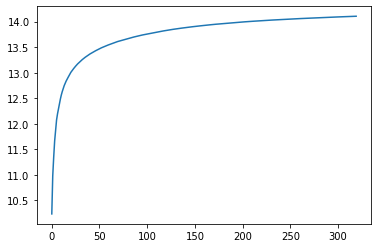

In [41]:
##### script to try the Galaxy Cluster DM generation

#--------------------
# imports
#--------------------

import os, sys, glob
import numpy as np
from utils import rotate_data, readsnapsgl, write_fits_image,plot_cluster
from astropy.cosmology import FlatLambdaCDM 

Code='GadgetX' # the simulation code
path="/home2/weiguang/The300/data/" 
#groupinfo=np.loadtxt("/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/G3X_Mass_snap_128-center-cluster.txt")
Simun = "simulation/"+Code+"/"
Outdir = './'

Use_Lra = True # use less rotations

# two arguments given to the function, the first and the last region



RAs = np.loadtxt('29_rotations.txt',dtype=np.int32)

selecth=np.load('/home2/weiguang/Project-300-Clusters/ML/Reselected_all_halos.npy')
#HID M200 Rid

    
#------------    
# Open data
#------------


for lp in [1]:
    clnum='0000'+str(lp)
    clnum=clnum[-4:]
    cname = "NewMDCLUSTER_"+clnum+"/"

    # Check outputs
    outcat = cname + "/"
    if not os.path.exists(outcat):
        os.mkdir(outcat)

    idr = np.where(np.int32(selecth[:,2]+0.1)==lp)[0]
    if len(idr)<1:
        raise ValueError('No regions find in selected halo',lp)

    Hids = np.int64(selecth[idr,0]+0.1)    #AHF halo IDs
    sn = np.array([np.int32(str(i)[:3]) for i in Hids])
    idshid=np.argsort(Hids)
    Hids=Hids[idshid]; sn=sn[idshid]; idr=idr[idshid]
    st=0
    
    for j, s, hid in zip(idr, sn , Hids): # loop over snaps
        print(j,s,hid)
        snapname = 'snap_'+str(s)
        #print(snapname)
        #ds = yt.load(path+Simun+cname+snapname, field_spec="my_def") # it can also be done using yt
        snapfile = path+Simun+cname+snapname
        
        head=readsnapsgl(path+Simun+cname+snapname,'HEAD')
        if head.Redshift<0:
            head.Redshift = 0.0000

        # load the data 
        particles = [0,1,4]
        imgs = []
        Ms = 0
        for particle in particles:
            print('PARTICLE TYPE = ', particle)
            pos = readsnapsgl(snapfile, 'POS ', ptype=particle)
            mass = readsnapsgl(snapfile, 'MASS', ptype=particle)
            print('path = ',snapfile)



            #------------    
            # Cuts
            #------------


            halo = np.load('/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/GadgetX/G3X_Mass_snap_'+str(s)+'info.npy')
            idg = np.where((halo[:,0]==lp) & (halo[:,1]==hid))[0]
            if len(idg) == 1:
                cc = halo[idg[0],4:7]; rr = halo[idg[0],7]
            else:
                raise ValueError('Halo not find.... ',lp,hid)

            # apply mask

            mask2= np.where((pos[:,0]<=cc[0]+2*rr)&(pos[:,0]>=cc[0]-2*rr)&
                    (pos[:,1]<=cc[1]+2*rr)&(pos[:,1]>=cc[1]-2*rr)&
                    (pos[:,2]<=cc[2]+2*rr)&(pos[:,2]>=cc[2]-2*rr))

            pos_inside = pos[mask2]
            mass_inside = mass[mask2]
            pos_centered = pos_inside

            #center the data to be rotated
            pos_inside[:,0] = pos_inside[:,0]-cc[0]
            pos_inside[:,1] = pos_inside[:,1]-cc[1]
            pos_inside[:,2] = pos_inside[:,2]-cc[2]



            def indices_inside(pos,r,center = (0,0,0)): 

                x = pos[:,0]
                y = pos[:,1]
                z = pos[:,2]

                mask = np.where((x**2+y**2+z**2)<=r**2)

                return mask


            mask_sphere = indices_inside(pos_inside,rr)
            print('MASA 3D:',np.log10(mass_inside[mask_sphere].sum()*1e10))
            Ms = Ms + mass_inside[mask_sphere].sum()
            print(np.log10(halo[idg[0],3]))

            #------------    
            # Rotations
            #------------
            ra = 0
            RA = RAs[0]
            rot = rotate_data(pos_inside,RA)[0]
            mask = np.where((rot[:,0]<=rr)&(rot[:,0]>=-rr)&
                    (rot[:,1]<=rr)&(rot[:,1]>=-rr)&
                    (rot[:,2]<=rr)&(rot[:,2]>=-rr))
            rot = rot[mask]

            w = mass_inside[mask]
            #------------    
            # Create the 2D projection
            #------------
            N = 640
            x = rot[:, 0] 
            y = rot[:,1] 
            img,xedges,yedges = np.histogram2d(x,y,bins=(N,N),weights=w)
            img = img.T
            plot_cluster(img)
            M_profile = mass_profile(img)

            import matplotlib.pyplot as plt
            plt.plot(np.arange(320),np.log10(M_profile))

            print('MASA 2D = ',np.log10(img.sum()*1e10))
            print(np.log10(halo[idg[0],3]))
            print(hid)
            print(cc)
            
            imgs.append(img)
            #------------    
            # Save data
            #------------
        img_tot = np.zeros(img.shape)
        for i in range(3):
            img_tot = img_tot+imgs[i]
            
        plot_cluster(img_tot)
        print('MASA 2D tot =',np.log10(img_tot.sum()*1e10))
        print('MASA 3D tot =', np.log10(Ms*1e10))
        M_profile = mass_profile(img_tot)
        print('MASA 2D CIL =',np.log10(M_profile[-1]))
        plt.plot(np.arange(320),np.log10(M_profile))
        
        # et voila

In [21]:
idg[0]

0

In [3]:
help(readsnapsgl)

Help on function readsnapsgl in module utils:

readsnapsgl(filename, block, endian=None, quiet=False, longid=False, nmet=11, fullmass=False, mu=None, fmt=None, ptype=None, rawdata=False)
    readsnapsgl(filename,block,endian=None,quiet=None,longid=None,met=None, fmt=None)
        read snapshot files and new subfind files, return any block result you need.
    
    Parameters:
    ---------------
        filename: path plus full file name. e.g.  /your/dir/snap_009.0
        block: The block you want to read, e.g. "HEAD". Look for more info with block == "INFO"
        little endian: ">", big endian : "<", other/default : "=" or "@"
        longid: Is the particle ID saved in long long (uint64)? Default : False
        nmet: Specify how many different matels are produced in the simulation, default: 11
        fullmass: return all mass of particles inorder of saved particle position
                  False(default): return only mass block
        mu: mean_molecular_weight. Specify this va

In [1]:
1+1

2

In [2]:
from utils import rotate_data, readsnapsgl, write_fits_image,plot_cluster

In [4]:
1+1

2

In [11]:
# check with original file
mpath = '/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/GadgetX/G3X_Mass_snap_025info.npy'

In [13]:
m = np.load(mpath)

In [51]:
np.log10(m[4][3])

10.895939413455555

array([4])

In [ ]:
##### script to try the Galaxy Cluster DM generation

def indices_inside(pos,r,center = (0,0,0)): 
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]

    mask = np.where((x**2+y**2+z**2)<r**2)

    return mask

def create_circular_mask(img, center=None, radius=None):
    
    h,w = img.shape

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask
    

#--------------------
# imports
#--------------------

import os, sys, glob
import numpy as np
from utils import rotate_data, readsnapsgl, write_fits_image
from astropy.cosmology import FlatLambdaCDM 

Code='GadgetX' # the simulation code
path="/home2/weiguang/The300/data/" 
#groupinfo=np.loadtxt("/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/G3X_Mass_snap_128-center-cluster.txt")
Simun = "simulation/"+Code+"/"
Outdir = './'

Use_Lra = True # use less rotations

# two arguments given to the function, the first and the last region

stn = 1
edn = 2


RAs = np.loadtxt('29_rotations.txt',dtype=np.int32)

selecth=np.load('/home2/weiguang/Project-300-Clusters/ML/Reselected_all_halos.npy')
#HID M200 Rid

    
#------------    
# Open data
#------------

particle = 0
particle_name = 'DM'

# particles = [0,1,4]
# [gas,DM,star]

for lp in np.arange(stn,edn):
    clnum='0000'+str(lp)
    clnum=clnum[-4:]
    cname = "NewMDCLUSTER_"+clnum+"/"

    # Check outputs
    outcat = cname + "/"
    if not os.path.exists(outcat):
        os.mkdir(outcat)

    idr = np.where(np.int32(selecth[:,2]+0.1)==lp)[0]
    if len(idr)<1:
        raise ValueError('No regions find in selected halo',lp)

    Hids = np.int64(selecth[idr,0]+0.1)    #AHF halo IDs
    sn = np.array([np.int32(str(i)[:3]) for i in Hids])
    idshid=np.argsort(Hids)
    Hids=Hids[idshid]; sn=sn[idshid]; idr=idr[idshid]
    st=0
    
    for j, s, hid in zip(idr, sn , Hids): # loop over snaps
        print(j,s,hid)
        snapname = 'snap_'+str(s)
        #print(snapname)
        #ds = yt.load(path+Simun+cname+snapname, field_spec="my_def") # it can also be done using yt
        snapfile = path+Simun+cname+snapname
        
        head=readsnapsgl(path+Simun+cname+snapname,'HEAD')
        if head.Redshift<0:
            head.Redshift = 0.0000

        # load the data 

 
        pos = readsnapsgl(snapfile, 'POS ', ptype=particle)
        mass = readsnapsgl(snapfile, 'MASS', ptype=particle)
        print('path = ',snapfile)


        
        
        #------------    
        # Cuts
        #------------
        
        
        halo = np.load('/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/GadgetX/G3X_Mass_snap_'+str(s)+'info.npy')
        idg = np.where((halo[:,0]==lp) & (halo[:,1]==hid))[0]
        if len(idg) == 1:
            cc = halo[idg[0],4:7]; rr = halo[idg[0],7]
        else:
            raise ValueError('Halo not find.... ',lp,hid)
        
        # apply mask
    
        mask2= np.where((pos[:,0]<=cc[0]+2*rr)&(pos[:,0]>=cc[0]-2*rr)&
                (pos[:,1]<=cc[1]+2*rr)&(pos[:,1]>=cc[1]-2*rr)&
                (pos[:,2]<=cc[2]+2*rr)&(pos[:,2]>=cc[2]-2*rr))
      

        pos_inside = pos[mask2]
        mass_inside = mass[mask2]
        pos_centered = pos_inside
        
        #center the data to be rotated
        pos_inside[:,0] = pos_inside[:,0]-cc[0]
        pos_inside[:,1] = pos_inside[:,1]-cc[1]
        pos_inside[:,2] = pos_inside[:,2]-cc[2]
        
       
        
        print(mass.shape)
        #------------    
        # Rotations
        #------------
        ra = 0
        for RA in RAs:
            
            
            

            
            rot = rotate_data(pos_inside,RA)[0]
            mask = np.where((rot[:,0]<=rr)&(rot[:,0]>=-rr)&
                    (rot[:,1]<=rr)&(rot[:,1]>=-rr)&
                    (rot[:,2]<=rr)&(rot[:,2]>=-rr))
            rot = rot[mask]
            w = mass_inside[mask]
            
            
            inside_sphere = indices_inside(rot,r=rr)
            
            print('M_sphere = ', w[inside_sphere].sum())
            
            
            #print(w.shape)
            #------------    
            # Create the 2D projection
            #------------
            N = 640
            x = rot[:, 0] 
            y = rot[:,1] 
            img,xedges,yedges = np.histogram2d(x,y,bins=(N,N),weights = w)
            img = img.T
            print('Mass map = ', img.sum())
            
            
            cilinder = create_circular_mask(img)
            print('cilinder Mass', img[cilinder].sum())
            
            #------------    
            # Save data
            #------------
            write_fits_image(img,
                             outcat + snapname + "-M"+ particle_name + "-cl-" + str(hid) + "-ra-" + str(ra) +".fits",
                             overwrite= True, 
                             comments=("Simulation Region: " + clnum,
                                  "AHF Halo ID: "+str(hid), 
                                  "Simulation redshift: " + str(head.Redshift)[:6],
                                  "log M_200 = "+str(np.log10(halo[idg[0],3]))[:6]+" Msun/h",
                                  "R_200 = "+str(rr)[:6]+" kpc/h"))
            
            ra+=1

0 123 123000000000001
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
detected file format endian =  <
Snapshot with Gadget 3 format with blocks
POS  363952740
VEL  363952740
ID   121317580
MASS 121317580
path =  /home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0001/snap_123
(6827361,)
M_sphere =  30146.71
Mass map =  34854.883488996886
cilinder Mass 33333.13534850348
M_sphere =  30146.71
Mass map =  34988.73077038815
cilinder Mass 33541.54787287954
M_sphere =  30146.71
Mass map =  34854.883488996886
cilinder Mass 33536.407741640694
M_sphere =  30146.71
Mass map =  34956.8234447455
cilinder Mass 33510.150649409276
M_sphere =  30146.71
Mass map =  34971.94508246705
cilinder Mass 33210.749498988036
M_sphere =  30146.71
Mass map =  35359.65657550562
cilinder Mass 33502.027649051975
M_sphere =  30146.71
Mass map =  34671.773803853896
cilinder Mass 33463.4273256156

In [18]:
# script to compute M profile

# run the function mass_profile to obtain a vector composed of the integrated mass from  the center to radius r_{i} in pixels.

import numpy as np


def c_mask(img,radius=None,center=None ):
    
    h, w =  img.shape
    
    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])
    
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

def mass_profile(img):
    M = []
    for i in range(int(len(img)/2)):
        mask = c_mask(img,radius=i)
        M.append(img[mask].sum())
    return np.array(M)*1e10 # this factors to account for units M_{sun}h^{-1}

In [1]:
halo

NameError: name 'halo' is not defined

In [15]:
A = np.load('/home2/weiguang/Project-300-Clusters/Halo_mass_function_mass-difference/GadgetX/G3X_Mass_snap_128info.npy')

In [18]:
A.shape

(99272, 16)

# check maps

In [10]:
def read_total_mass(lp,hid,RA):
    region = 'NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-DM-cl-{}-ra-{}.fits'.format(s,hid,RA)
    #print(RA)
    data = fits.getdata(path+region+file)
    return data

In [11]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [13]:
path = '/home2/deandres/clusters2dmaps/'

In [25]:
lp = 1
hid = 128000000000005
RA = 0

img = read_total_mass(lp,hid,RA)

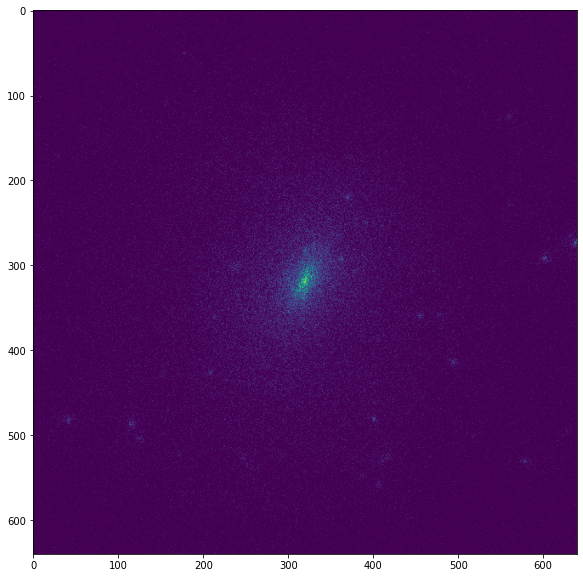

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [19]:
mp = mass_profile(img)

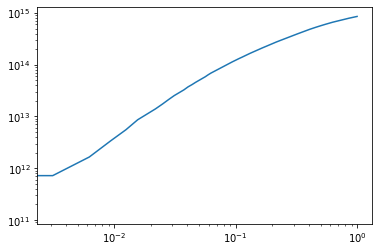

In [24]:
plt.plot(np.arange(320)/320,mp)
plt.xscale('log')
plt.yscale('log')